# Part 1: Introduction and Data Preprocessing

## Introduction

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
pd.set_option('chained_assignment', None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Reading csv telecom churn data

In [3]:
raw_churn = pd.read_csv('telecom_churn_data.csv')


In [4]:
raw_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

**The descriptive stats already is helping us drop some variable. These variables have all 0 and has no discriminating power** <br>

loc_og_t2o_mou	
std_og_t2o_mou	
loc_ic_t2o_mou

**Same is the case with below variables :**<br>
std_ic_t2o_mou_6	
std_ic_t2o_mou_7	
std_ic_t2o_mou_8	
std_ic_t2o_mou_9

std_og_t2c_mou_6	
std_og_t2c_mou_7	
std_og_t2c_mou_8	
std_og_t2c_mou_9


In [5]:
(raw_churn.isnull().sum()/len(raw_churn.index))*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [6]:
raw_churn2 = raw_churn.drop(
    columns=[
        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
        'std_og_t2c_mou_9', 'std_ic_t2o_mou_9'
    ],
    axis=1)

#### Imputing nulls with 0 for some important columns classifying customers as high value customers

In [7]:
raw_churn2['total_rech_data_6'].fillna(0, inplace=True)
raw_churn2['total_rech_data_7'].fillna(0, inplace=True)
raw_churn2['total_rech_data_8'].fillna(0, inplace=True)
raw_churn2['total_rech_data_9'].fillna(0, inplace=True)
raw_churn2['max_rech_data_6'].fillna(0, inplace=True)
raw_churn2['max_rech_data_7'].fillna(0, inplace=True)
raw_churn2['max_rech_data_8'].fillna(0, inplace=True)
raw_churn2['max_rech_data_9'].fillna(0, inplace=True)

### Identifying high value customers

In [8]:
raw_churn2['avg_rchg_amt'] = (
    raw_churn2['total_rech_amt_6'] + raw_churn2['total_rech_data_6'] +
    raw_churn2['total_rech_amt_7'] + raw_churn2['total_rech_data_7']) / 2
pct_70 = np.nanpercentile(raw_churn2['avg_rchg_amt'], 70)
raw_churn3 = raw_churn2[raw_churn2['avg_rchg_amt'] >= pct_70]

### Marking customer as churn/non churn 1/0

In [9]:
raw_churn3['churn'] = np.where(
    (raw_churn3.total_ic_mou_9 + raw_churn3.total_og_mou_9 +
     raw_churn3.vol_2g_mb_9 + raw_churn3.vol_3g_mb_9) == 0, 1, 0)

In [10]:
raw_churn3[raw_churn3['churn']==1].churn.count()

2590

### fetching and dropping '_9' ending columns which are churn phase related

In [11]:
churn_cols = [col for col in raw_churn3.columns if '_9' in col]

In [12]:
raw_churn4 = raw_churn3.drop(columns=churn_cols, axis=1)

In [13]:
#raw_churn.describe()
(raw_churn4.isnull().sum()/len(raw_churn4.index))*100

mobile_number                0.000000
circle_id                    0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.103268
last_date_of_month_8         0.523002
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.052667
onnet_mou_7                  1.009361
onnet_mou_8                  3.131350
offnet_mou_6                 1.052667
offnet_mou_7                 1.009361
offnet_mou_8                 3.131350
roam_ic_mou_6                1.052667
roam_ic_mou_7                1.009361
roam_ic_mou_8                3.131350
roam_og_mou_6                1.052667
roam_og_mou_7                1.009361
roam_og_mou_8                3.131350
loc_og_t2t_mou_6             1.052667
loc_og_t2t_mou_7             1.009361
loc_og_t2t_mou_8             3.131350
loc_og_t2m_mou_6             1.052667
loc_og_t2m_mou_7             1.009361
loc_og_t2m_mou_8             3.131350
loc_og_t2f_m

### Imputing categorical columns nulls with -1 to create a new category

In [14]:
raw_churn4['night_pck_user_6'] = raw_churn4['night_pck_user_6'].fillna(-1)
raw_churn4['night_pck_user_7'] = raw_churn4['night_pck_user_7'].fillna(-1)
raw_churn4['night_pck_user_8'] = raw_churn4['night_pck_user_8'].fillna(-1)
raw_churn4['fb_user_6'] = raw_churn4['fb_user_6'].fillna(-1)
raw_churn4['fb_user_7'] = raw_churn4['fb_user_7'].fillna(-1)
raw_churn4['fb_user_8'] = raw_churn4['fb_user_8'].fillna(-1)

In [15]:
## Filling the remaining missing values with 0 as most of the times in telecom data, missing simply means non-usage or 0.
raw_churn5 = raw_churn4.fillna(0)

### Replacing the categorical variable with the ratio of churn/(churn+nonchurn) for each level

In [16]:
cols = [
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6',
    'night_pck_user_7', 'night_pck_user_8'
]
ranges = [0, 1, -1]
for i in cols:
    for j in ranges:
        try:
            x = raw_churn5[raw_churn5[i] == j].groupby(
                ['churn'])['churn'].count().unique()
            raw_churn5.loc[raw_churn5[i] == j, i] = x[1] / (x[0] + x[1])
        except Exception as e:
            print(e)

### Creating a derived variable recharge_gap to quantify the gap between recharges doen in 8th month vs 6th and 7th months

In [17]:
raw_churn5['recharge_gap_temp'] = (pd.to_datetime(raw_churn5['date_of_last_rech_8']) - pd.to_datetime(raw_churn5['date_of_last_rech_7']))/np.timedelta64(1, 'D')
raw_churn5['recharge_gap_temp2'] = (pd.to_datetime(raw_churn5['date_of_last_rech_8']) - pd.to_datetime(raw_churn5['date_of_last_rech_6']))/np.timedelta64(1, 'D')
raw_churn5['recharge_gap'] = raw_churn5[['recharge_gap_temp','recharge_gap_temp2']]. \
apply(lambda x : x[0] if x[0]>0 and x[0]<62 else (120 if x[0]== 0 else (15 if x[0]>62 else 90)), axis = 1)

In [18]:
raw_churn5.loc[raw_churn5['recharge_gap_temp2']>90,['recharge_gap','recharge_gap_temp2','date_of_last_rech_8','date_of_last_rech_6']].head(10)

,recharge_gap,recharge_gap_temp2,date_of_last_rech_8,date_of_last_rech_6
1576,30.0,16311.0,8/29/2014,0
1708,18.0,16284.0,8/2/2014,0
4537,29.0,16310.0,8/28/2014,0
5975,31.0,91.0,8/31/2014,6/1/2014
6319,35.0,16310.0,8/28/2014,0
9917,31.0,16313.0,8/31/2014,0
9944,36.0,16306.0,8/24/2014,0
10191,28.0,16308.0,8/26/2014,0
10863,30.0,16311.0,8/29/2014,0
12753,33.0,16305.0,8/23/2014,0


### Creating another variable to quantify how late a a recharge is made from starting of a month compared to last month

In [19]:
print('total unique values in "date_of_last_rech_6":',
      len(raw_churn5['date_of_last_rech_6'].unique()))
print('total unique values in "date_of_last_rech_7":',
      len(raw_churn5['date_of_last_rech_7'].unique()))
print('total unique values in "date_of_last_rech_8":',
      len(raw_churn5['date_of_last_rech_8'].unique()))

dte_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


def processdate(dte):
    if dte == 0:
        return 0
    else:
        return int(dte.split('/')[1])


## date
dte_val = None
for col in dte_col:
    raw_churn5['_' + col] = [processdate(date) for date in raw_churn5[col]]

## differece 6_8, 7_8
raw_churn5[
    'datediff_of_last_rech_6_7'] = raw_churn5['_date_of_last_rech_6'] - raw_churn5['_date_of_last_rech_7']
raw_churn5[
    'datediff_of_last_rech_6_7'] = raw_churn5['_date_of_last_rech_7'] - raw_churn5['_date_of_last_rech_8']

total unique values in "date_of_last_rech_6": 31
total unique values in "date_of_last_rech_7": 32
total unique values in "date_of_last_rech_8": 32


### Creating few other derived variables

In [20]:
raw_churn5['arpu_l3m'] = raw_churn5[['arpu_6','arpu_7','arpu_8']].sum(axis=1)
raw_churn5['avg_arpu_l3m'] = (raw_churn5['arpu_l3m']/3)
raw_churn5['avg_arpu_vs_arpu_8'] = (raw_churn5['avg_arpu_l3m']-raw_churn5['arpu_8'])
raw_churn5['total_onnet_mou_l3m'] = raw_churn5[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].sum(axis=1)
raw_churn5['total_offnet_mou_l3m'] = raw_churn5[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].sum(axis=1)
raw_churn5['total_mou'] = raw_churn5[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].sum(axis=1)
raw_churn5['total_roam_ic_mou_l3m'] = raw_churn5[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].sum(axis=1)
raw_churn5['total_roam_og_mou_l3m'] = raw_churn5[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].sum(axis=1)
raw_churn5['total_roam_mou_l3m'] = raw_churn5[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].sum(axis=1)


In [21]:
raw_churn5['total_vol_used'] = (raw_churn5[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']].sum(axis=1))

raw_churn5['avg_rech_amt_l3m'] = (raw_churn5[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].sum(axis=1)/3)
raw_churn5['avg_rech_amt_vs_total_rech_8'] = (raw_churn5['avg_rech_amt_l3m']- raw_churn5['total_rech_amt_8'])
raw_churn5['total_vol_78'] = (raw_churn5[['vol_3g_mb_7','vol_3g_mb_8','vol_2g_mb_7','vol_2g_mb_8']].sum(axis=1))
raw_churn5['total_vol_q70_78'] = pd.qcut(raw_churn5['total_vol_78'],[0,0.7,1], labels=False)


### Dropping unecessary variables

In [22]:
raw_churn6 = raw_churn5.drop(
    columns=[
        'mobile_number', 'circle_id', 'last_date_of_month_6',
        'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
        'date_of_last_rech_7', 'date_of_last_rech_8',
        'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
        'date_of_last_rech_data_8', 'sep_vbc_3g', 'recharge_gap_temp2',
        'recharge_gap_temp'
    ],
    axis=1)

In [23]:
raw_churn7 =raw_churn6

### Creating some derived variables to see average decline in usage and recharge and other important variables from 6th to 8th and 7th to 8th months

In [24]:
raw_churn7['temp_67'] = raw_churn7[['onnet_mou_6','onnet_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['onnet_mou_7','onnet_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_onnet_mou_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['offnet_mou_6','offnet_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['offnet_mou_7','offnet_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_offnet_mou_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['total_og_mou_6','total_og_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['total_og_mou_7','total_og_mou_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_total_og_mou_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['total_rech_num_6','total_rech_num_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['total_rech_num_7','total_rech_num_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_total_rech_num_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['total_rech_data_6','total_rech_data_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['total_rech_data_7','total_rech_data_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_total_rech_data_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['jun_vbc_3g','aug_vbc_3g']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['jul_vbc_3g','aug_vbc_3g']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_vbc_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['monthly_3g_6','monthly_3g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['monthly_3g_7','monthly_3g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_monthly_3g_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['arpu_3g_6','arpu_3g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['arpu_3g_7','arpu_3g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_arpu_3g_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7['temp_67'] = raw_churn7[['arpu_2g_6','arpu_2g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['temp_68'] = raw_churn7[['arpu_2g_7','arpu_2g_8']].apply(lambda x : x[0] - x[1] if x[0] - x[1] > 0 else 0, axis = 1)
raw_churn7['avg_arpu_2g_decline'] = (raw_churn7['temp_67']+raw_churn7['temp_68'])/2

raw_churn7.drop(columns = ['temp_67','temp_68'],axis = 1, inplace=True)



### Lets analyze some important variables using EDA, with box plots.

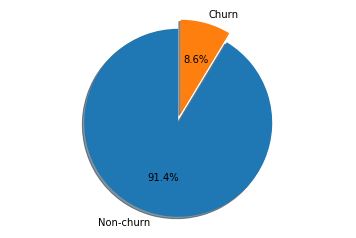

In [35]:
labels = 'Non-churn', 'Churn'
sizes = [
    100 - round(raw_churn7['churn'].mean() * 100, 2),
    round(raw_churn7['churn'].mean() * 100, 2)
]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**We can see that we have very imbalanced class with 8.6% of churned consumers as compared to 91.4% of non-churn consumers**

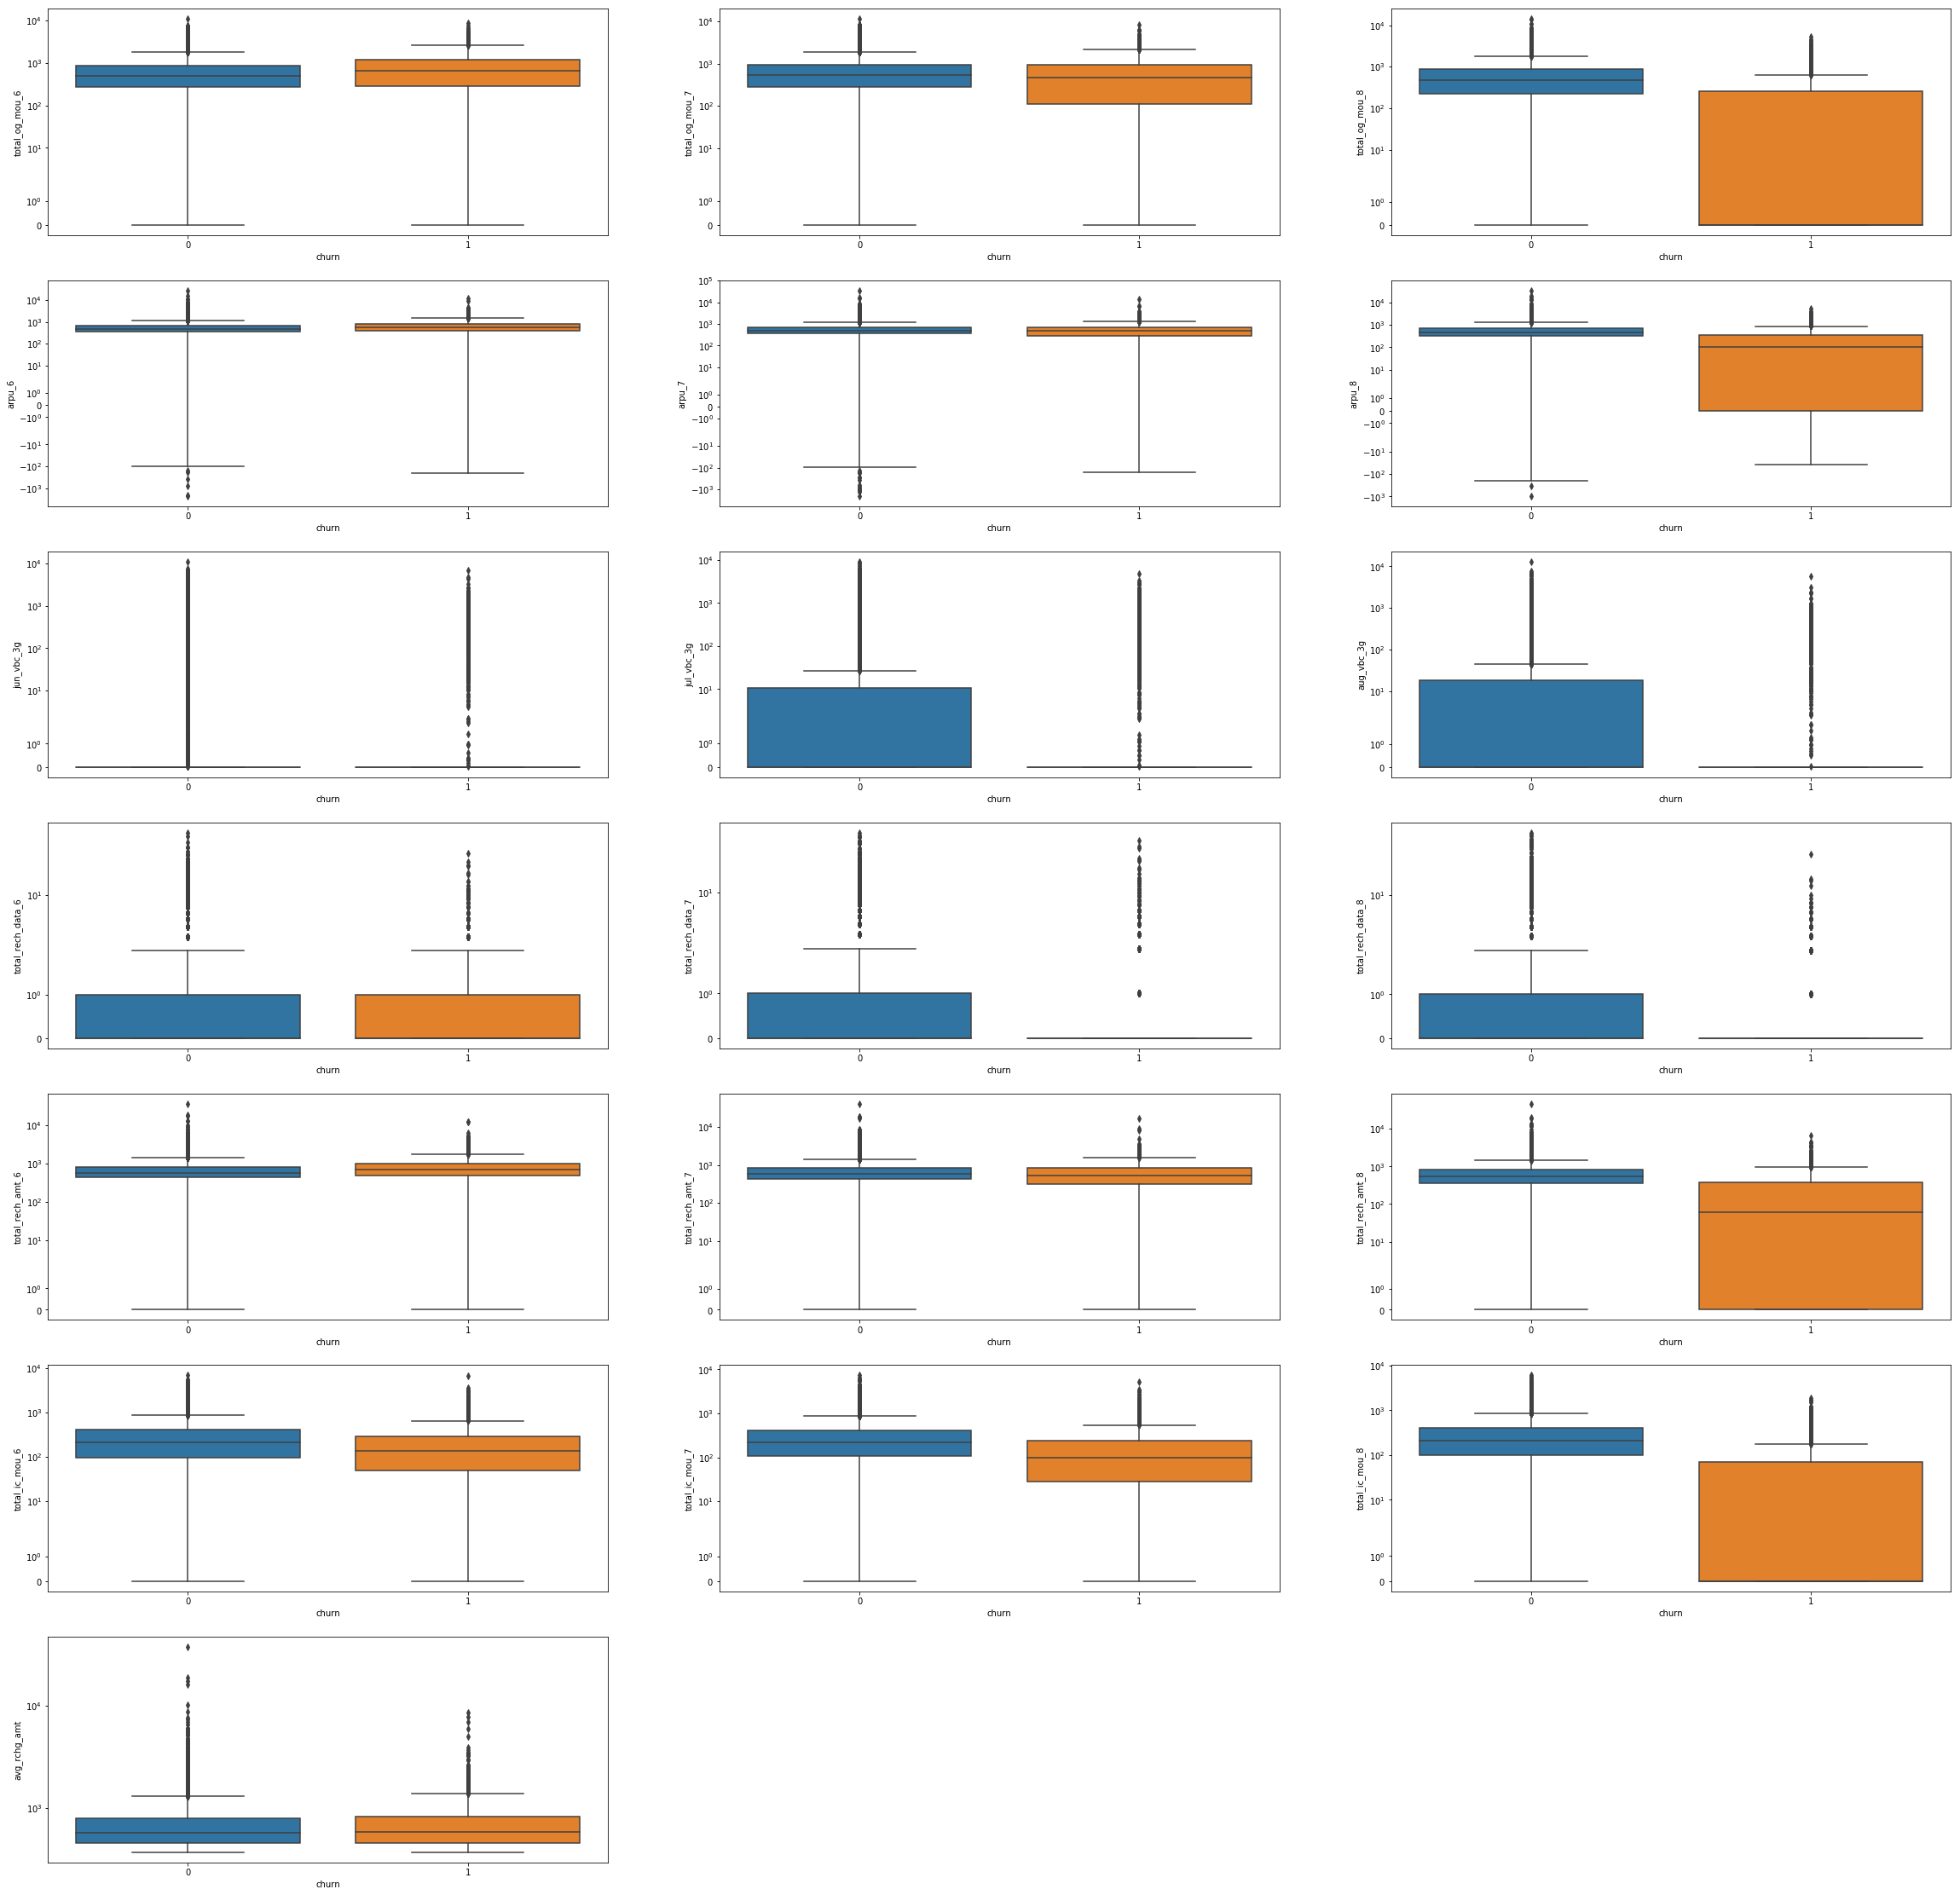

In [39]:

warnings.filterwarnings("ignore", category=RuntimeWarning)
# Understanding how median price changes by various levels/factors within each categorical variable, using bivariate anlysis
# (Bviolin plots)
var_list = [
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'arpu_6', 'arpu_7',
    'arpu_8', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'total_rech_data_6',
    'total_rech_data_7', 'total_rech_data_8', 'total_rech_amt_6',
    'total_rech_amt_7', 'total_rech_amt_8', 'total_ic_mou_6', 'total_ic_mou_7',
    'total_ic_mou_8', 'avg_rchg_amt'
]

plt.figure(figsize=(40, 40))
for i, var in enumerate(var_list):
    plt.subplot(7, 3, i + 1)
    plt.xlabel(var)
    plt.ylabel('box')
    plt.yscale('symlog')
    sns.boxplot(x='churn', y=var, data=raw_churn7)
plt.show()

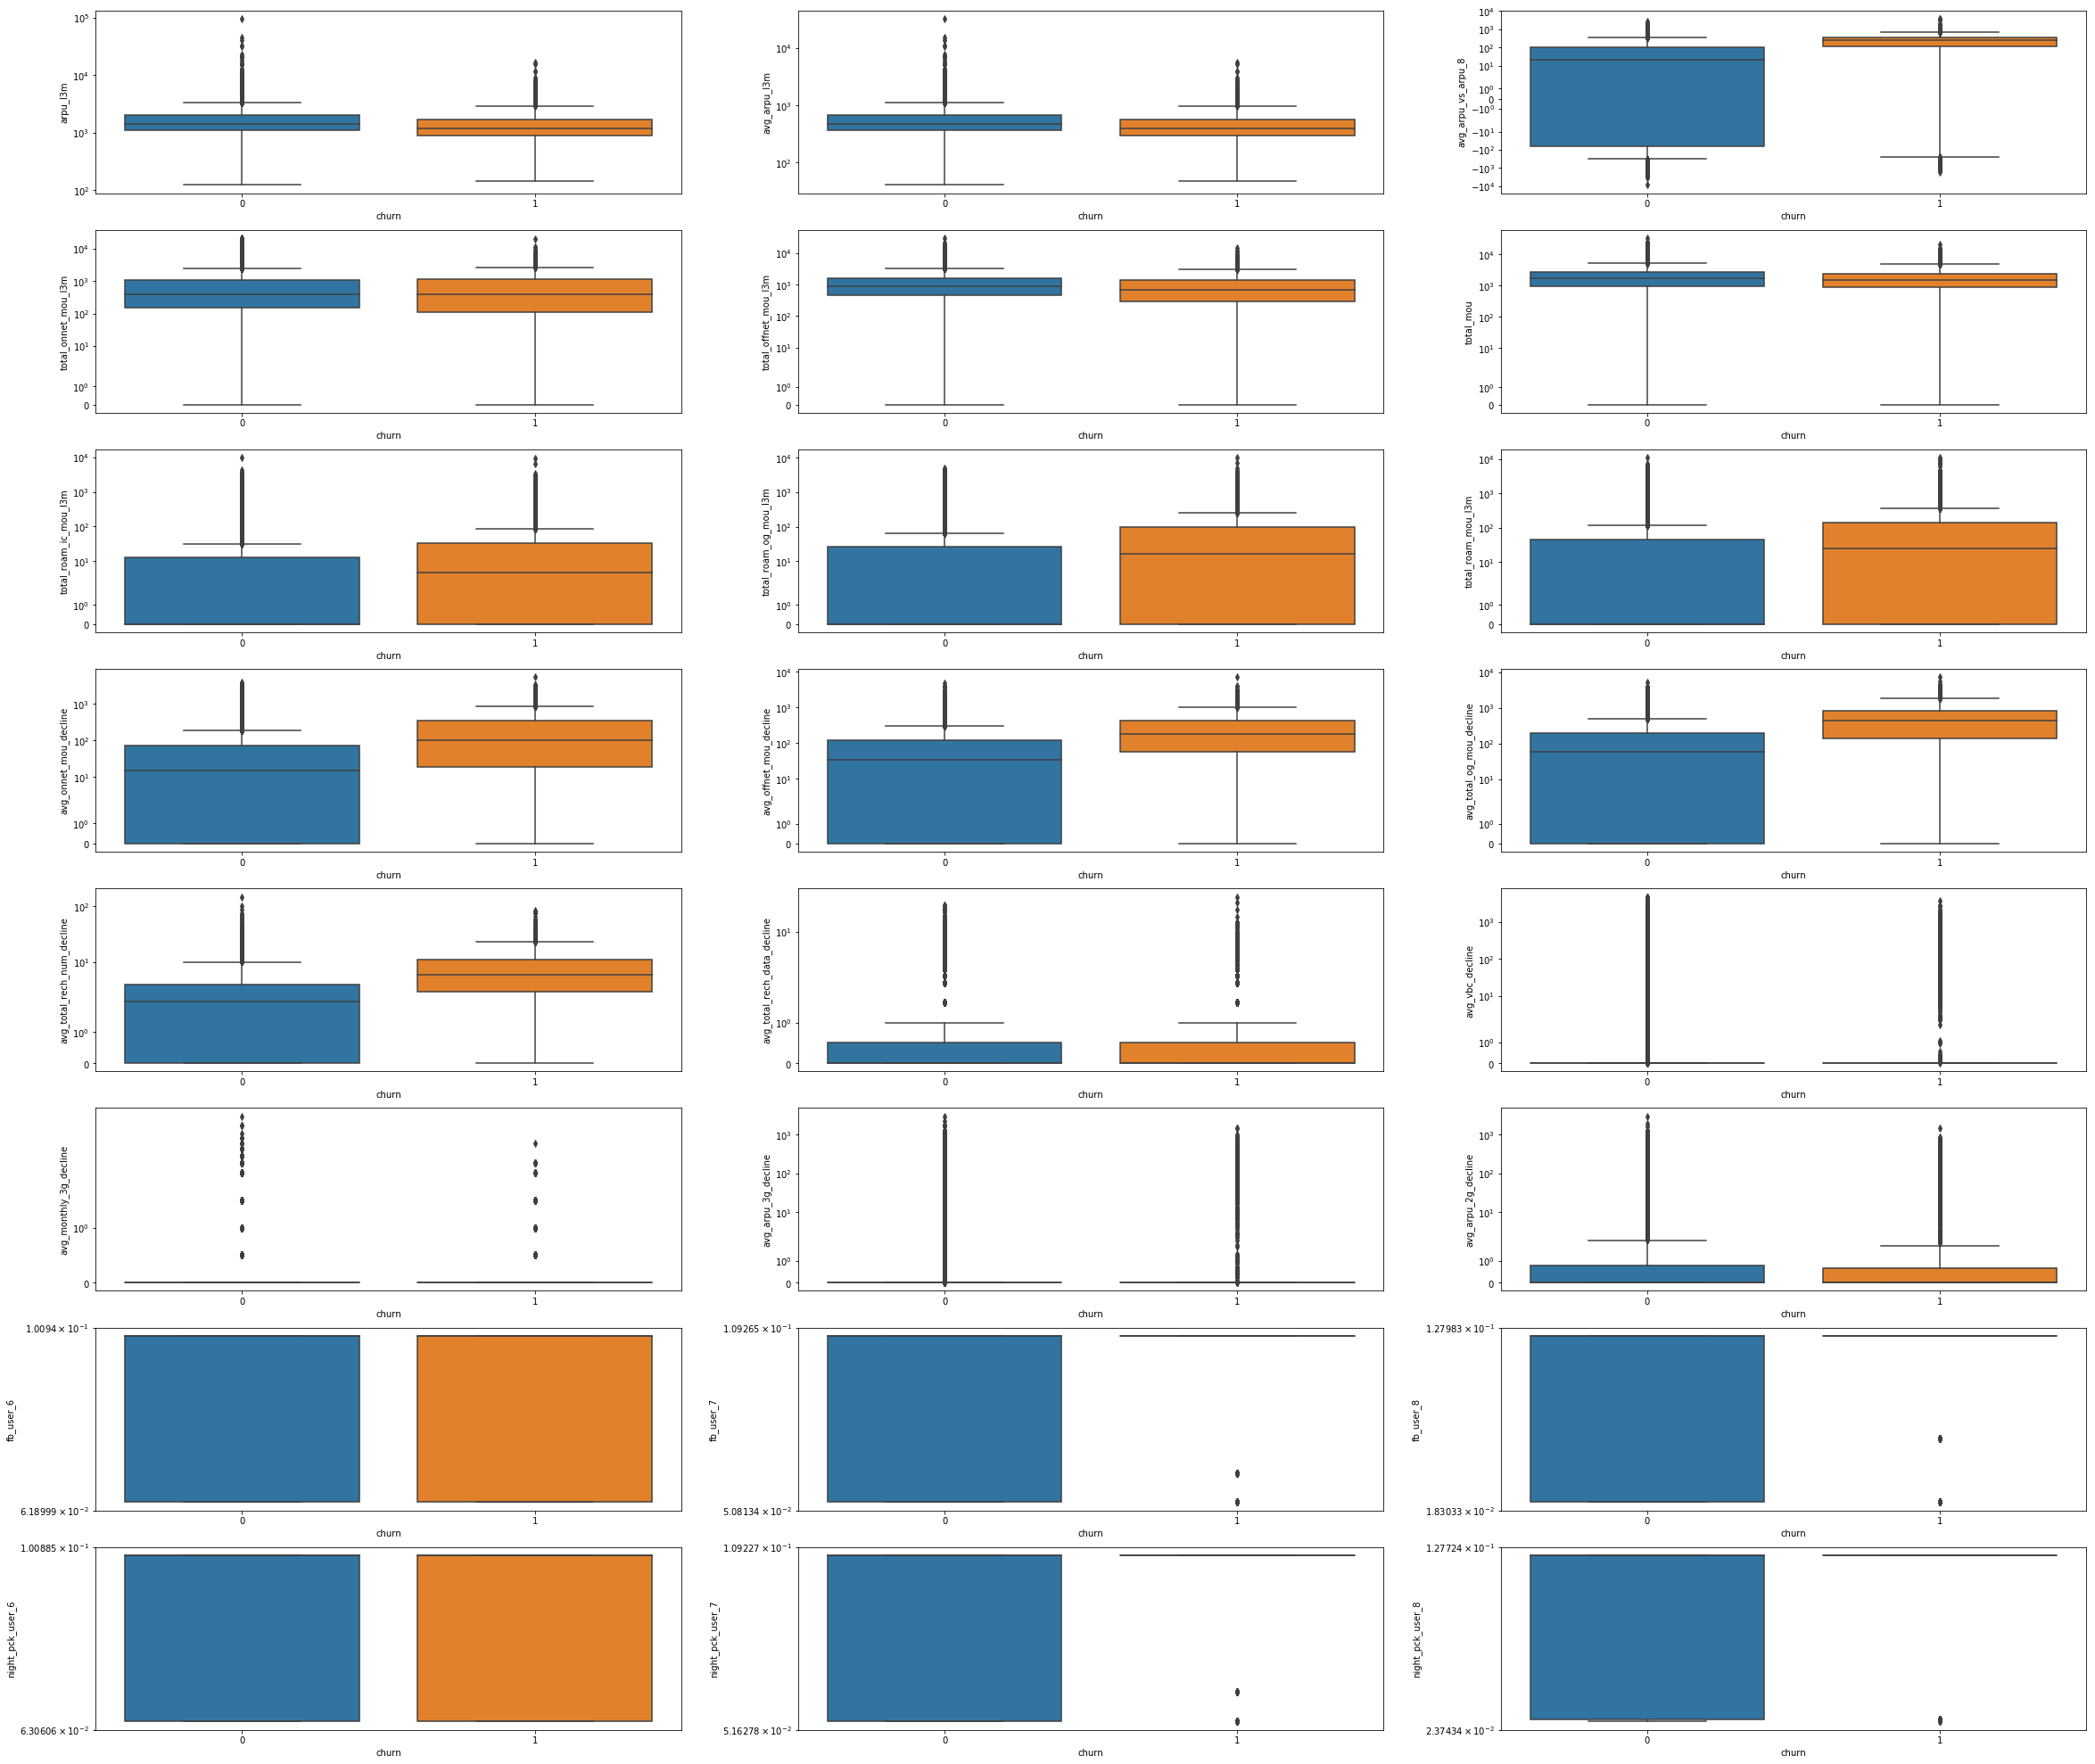

In [40]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Understanding how median price changes by various levels/factors within each categorical variable, using bivariate anlysis
# (Bviolin plots)
var_list = [
    'arpu_l3m', 'avg_arpu_l3m', 'avg_arpu_vs_arpu_8', 'total_onnet_mou_l3m',
    'total_offnet_mou_l3m', 'total_mou', 'total_roam_ic_mou_l3m',
    'total_roam_og_mou_l3m', 'total_roam_mou_l3m', 'avg_onnet_mou_decline',
    'avg_offnet_mou_decline', 'avg_total_og_mou_decline',
    'avg_total_rech_num_decline', 'avg_total_rech_data_decline',
    'avg_vbc_decline', 'avg_monthly_3g_decline', 'avg_arpu_3g_decline',
    'avg_arpu_2g_decline', 'fb_user_6', 'fb_user_7', 'fb_user_8',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'
]

plt.figure(figsize=(40, 40))
for i, var in enumerate(var_list):
    plt.subplot(9, 3, i + 1)
    plt.xlabel(var)
    plt.ylabel('box')
    plt.yscale('symlog')
    sns.boxplot(x='churn', y=var, data=raw_churn7)
plt.show()

<b>Some variables which can be highlighted from these plots could be:

- In total_og_mou we see that the 8th month median usage is lesser for  churner compared to non-churners in 8th month as well as compared to 6th and 7th month. 

- For arpu also we see that the spread changes a lot for churners in 8th month and we have a lot of data points below the medians in 6th and 7th month, suggesting decrease in average revenue in 8th month, especially for churners.

- Total recharge in data was comparative for churners and non-churners in 6th month but it goes down for churners in 7th and 8th month

- Total recharge amount median shows a slow decreasing trend in median from 6th to 8th month for churners.

- Total incoming mou also shows large number of data points for churners in 8th month below the medians  when compared to churners in 8th as  well as 6th and 7th month. The median and range of values are much more similar for churners and non-churmers in 6th and 7th month, compared to 8th month.

- fb user and night pack variables suggest comparative number of data points and in 6th month but it reduces a lot for churners in 7th and 8th month. But we do see very few high value data points for churner ( the thin line towards the top in the box plot). 

In [41]:
#created column list on which we want to apply outlier treatment
cols_ot = ['arpu_6',
'arpu_7',
'arpu_8',
'onnet_mou_6',
'onnet_mou_7',
'onnet_mou_8',
'offnet_mou_6',
'offnet_mou_7',
'offnet_mou_8',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'loc_og_t2t_mou_6',
'loc_og_t2t_mou_7',
'loc_og_t2t_mou_8',
'loc_og_t2m_mou_6',
'loc_og_t2m_mou_7',
'loc_og_t2m_mou_8',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_mou_6',
'loc_og_mou_7',
'loc_og_mou_8',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_mou_6',
'std_og_mou_7',
'std_og_mou_8',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'og_others_6',
'og_others_7',
'og_others_8',
'total_og_mou_6',
'total_og_mou_7',
'total_og_mou_8',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'total_ic_mou_6',
'total_ic_mou_7',
'total_ic_mou_8',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'max_rech_amt_6',
'max_rech_amt_7',
'max_rech_amt_8',
'last_day_rch_amt_6',
'last_day_rch_amt_7',
'last_day_rch_amt_8',
'total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'vol_2g_mb_6',
'vol_2g_mb_7',
'vol_2g_mb_8',
'vol_3g_mb_6',
'vol_3g_mb_7',
'vol_3g_mb_8',
'arpu_3g_6',
'arpu_3g_7',
'arpu_3g_8',
'arpu_2g_6',
'arpu_2g_7',
'arpu_2g_8',
'monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'sachet_2g_6',
'sachet_2g_7',
'sachet_2g_8',
'monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8',
'sachet_3g_6',
'sachet_3g_7',
'sachet_3g_8',
'aon',
'aug_vbc_3g',
'jul_vbc_3g',
'jun_vbc_3g',
'avg_rchg_amt',
'arpu_l3m',
'avg_arpu_l3m',
'avg_arpu_vs_arpu_8',
'total_onnet_mou_l3m',
'total_offnet_mou_l3m',
'total_mou',
'total_roam_ic_mou_l3m',
'total_roam_og_mou_l3m',
'total_roam_mou_l3m',
'avg_onnet_mou_decline',
'avg_offnet_mou_decline',
'avg_total_og_mou_decline',
'avg_total_rech_num_decline',
'avg_total_rech_data_decline',
'avg_vbc_decline',
'avg_monthly_3g_decline',
'avg_arpu_3g_decline',
'avg_arpu_2g_decline',
'avg_rech_amt_l3m',
'avg_rech_amt_vs_total_rech_8',
'total_vol_78'
]

### Outlier treatment

In [42]:
def replace(var, stds):
    import numpy as np
    var[np.abs(var - var.mean()) > stds * var.std()] = stds * var.std()
    return var


raw_churn7 = raw_churn6.copy()
for i in cols_ot:
    raw_churn7[i] = raw_churn7[i].transform(lambda g: replace(g, 2.17))

### Scaling  data and test-train split

In [43]:
raw_churn7_scale = raw_churn7.drop(columns='churn', axis=1)
raw_churn7_scaled = StandardScaler().fit_transform(raw_churn7_scale)
scaled_df = pd.DataFrame(
    raw_churn7_scaled,
    index=raw_churn7_scale.index,
    columns=raw_churn7_scale.columns)
raw_churn_target = raw_churn7['churn']
raw_churn8 = pd.concat([scaled_df, raw_churn_target], axis=1)

In [44]:
X = raw_churn8.drop(columns='churn')
y = raw_churn8['churn']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100) ## ***train test split with 70/30 ratio***

In [46]:
X_train.shape

(21013, 180)

### PCA transformation

Currently we have 180 variables, hence doing PCA transformation for variable reduction

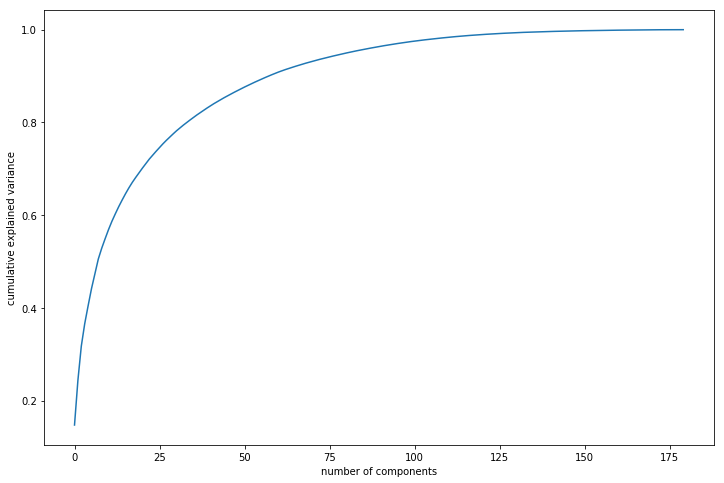

In [47]:
pca = PCA(random_state=100)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

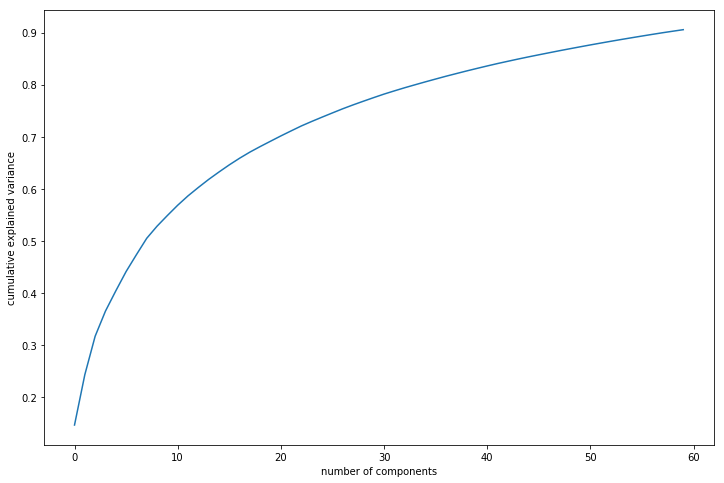

In [48]:
pca = PCA(random_state=100, n_components=60)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

***Approximately 90% of the variability in the data is covered by 60 components, hence we have effectively reduced from 180 to 60 by PCA transformation just by loosing only 10% of the variability*** 

In [49]:
principalDf = pd.DataFrame(
    data=df_train_pca[:, 0:2],
    columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, raw_churn8[['churn']]], axis=1)

In [50]:
df_train_pca.shape

(21013, 60)

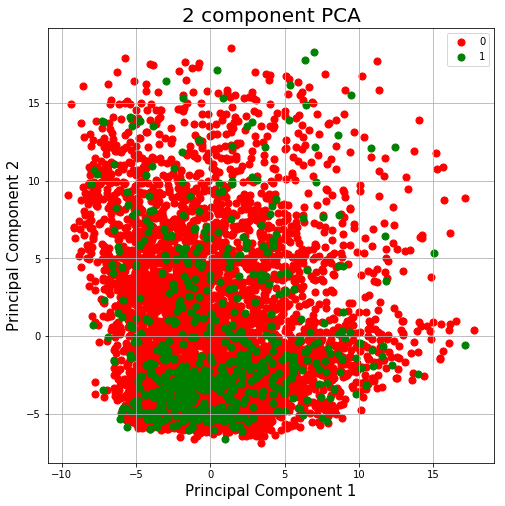

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['churn'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 2'],
        finalDf.loc[indicesToKeep, 'principal component 1'],
        c=color,
        s=50)
ax.legend(targets)
ax.grid()

### Oversampling using SMOTE

In [51]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_sample(df_train_pca, y_train)
#X_resampled, y_resampled = ADASYN().fit_sample(X_train, y_train)

***Originally we had 8.6% of the churn consumers in original data, which is highly imbalanced, hence using SOMTE oversampling technique for balancing data***

In [56]:
churn_ratio = (y_resampled.shape[0]/X_resampled.shape[0])
non_churn = 100 - churn_ratio
print(churn_ratio)

1.0


<b> Now We can see that we have equal ratio 

# Part 2 : Modeling

## SVM Classifier

### Trying Linear SVM using grid search approach

In [53]:
# Kfold Splits using StratifiedKfold mehtod
folds = KFold(n_splits=5, shuffle=True, random_state=100)

hyper_params = [{'C': [0.1, 0.5, 1, 5, 10, 100]}]

# specify model
model_LSVC = LinearSVC(dual=False)

# set up GridSearchCV()
model_cv_LSVC = GridSearchCV(
    estimator=model_LSVC,
    param_grid=hyper_params,
    scoring='recall',
    cv=folds,
    verbose=1,
    return_train_score=True)

# fit the model
model_cv_LSVC.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 0.5, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [54]:
# cv results
cv_results_LSVC = pd.DataFrame(model_cv_LSVC.cv_results_)
#cv_results

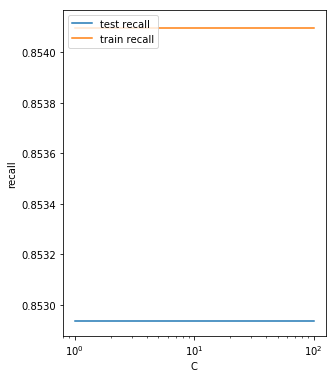

In [55]:
cv_results_LSVC['param_C'] = cv_results_LSVC['param_C'].astype('int')

plt.figure(figsize=(16, 6))
plt.subplot(131)

plt.plot(cv_results_LSVC["param_C"], cv_results_LSVC["mean_test_score"])
plt.plot(cv_results_LSVC["param_C"], cv_results_LSVC["mean_train_score"])
plt.xlabel('C')
plt.ylabel('recall')
#plt.ylim([0.60, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

In [56]:
#Best Values for hyperparameters
best_score = model_cv_LSVC.best_score_
best_hyperparams = model_cv_LSVC.best_params_

print("The best score is {0} for parameter {1}".format(best_score,
                                                       best_hyperparams))

The best score is 0.8529858206361526 for parameter {'C': 0.1}


In [57]:
# Creating final model using the best identified hyper parameters
from sklearn.svm import LinearSVC
svc2 = LinearSVC(dual=False, class_weight={1: 1}, C=5)
svc2.fit(X_resampled, y_resampled)
y_pred = svc2.predict(df_test_pca)

In [58]:
# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[6994 1213]
 [ 138  661]]


In [59]:
## Priting classification report with important parameters, focus on recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['nochurn', 'churn']))

             precision    recall  f1-score   support

    nochurn       0.98      0.85      0.91      8207
      churn       0.35      0.83      0.49       799

avg / total       0.92      0.85      0.87      9006



#### We see that the Linear SVM model here is being affected a lot by the class weight, as expected and can swing towards churn or non churn based on class_weight parameter

### Trying SVM with rbf kernel to check non linear fit
#### Note : Takes some time to run

In [62]:
# Kfold Splits using StratifiedKfold mehtod
folds = KFold(n_splits=3, shuffle=True, random_state=100)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [5, 10, 100]}]

# specify model
model = SVC(kernel="rbf", tol=1e-2)

model_cv = GridSearchCV(
    estimator=model,
    param_grid=hyper_params,
    scoring='recall',
    cv=folds,
    verbose=1,
    return_train_score=True)

# fit the model
model_cv.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 24.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.01, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [63]:
# cv results
cv_results_NLSVM = pd.DataFrame(model_cv.cv_results_)
#cv_results

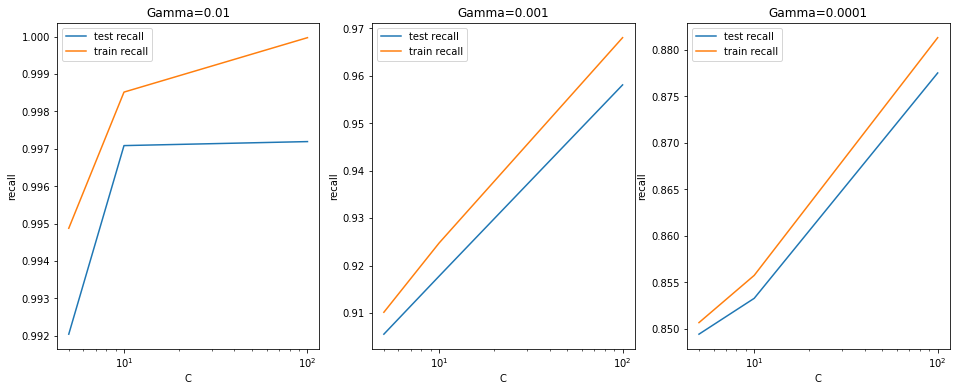

In [64]:
cv_results_NLSVM['param_C'] = cv_results_NLSVM['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16, 6))

plt.subplot(131)
gamma_01 = cv_results_NLSVM[cv_results_NLSVM['param_gamma'] == 0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])

plt.xlabel('C')
plt.ylabel('recall')
plt.title("Gamma=0.01")
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

plt.subplot(132)

gamma_001 = cv_results_NLSVM[cv_results_NLSVM['param_gamma'] == 0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])

plt.xlabel('C')
plt.ylabel('recall')
plt.title("Gamma=0.001")
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results_NLSVM[cv_results_NLSVM['param_gamma'] == 0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])

plt.xlabel('C')
plt.ylabel('recall')
plt.title("Gamma=0.0001")
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

In [65]:
# best parameters chosen
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best score is {0} for parameter {1}".format(best_score,
                                                       best_hyperparams))

The best score is 0.997193973347298 for parameter {'C': 100, 'gamma': 0.01}


#### We see that train and test score are operating with a small range for variou values of C. keeping a high value of C will result in overfitting. We can choose a smaller value of C and look at the test score

#### Building model with twice weight to churn class

In [67]:
## Building final SVM-rbf model with chosen parameters
final_NLSVM = SVC(kernel="rbf", C=0.7, gamma=0.01, class_weight={1: 2})
final_NLSVM.fit(X_resampled, y_resampled)
y_pred = final_NLSVM.predict(df_test_pca)

In [68]:
## Priting classification report with important parameters, focus on recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['nochurn', 'churn']))

             precision    recall  f1-score   support

    nochurn       0.95      0.95      0.95      8207
      churn       0.49      0.45      0.47       799

avg / total       0.91      0.91      0.91      9006



#### building non linear model with 3 times weight to churn class

In [69]:
## Building final SVM-rbf model with chosen parameters
final_NLSVM = SVC(kernel="rbf", C=0.7, gamma=0.01, class_weight={1: 3})
final_NLSVM.fit(X_resampled, y_resampled)

SVC(C=0.7, cache_size=200, class_weight={1: 3}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
y_pred = final_NLSVM.predict(df_test_pca)

In [71]:
## Priting classification report with important parameters, focus on recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['nochurn', 'churn']))

             precision    recall  f1-score   support

    nochurn       0.97      0.89      0.93      8207
      churn       0.40      0.74      0.52       799

avg / total       0.92      0.88      0.90      9006



#### We see that class weight has a lot of impact on the model results where churn recall can increase or decrease. however we should keep a balance on both the sides and improve average recall, and hence 1:2 ratio is doing better

## ADABOOST using Gridsearch Technique
### Note : Takes some time to run

In [91]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree, learning_rate=0.1, algorithm="SAMME.R")

In [ ]:
tree = DecisionTreeClassifier()
# creating a KFold object with 3 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

hyper_params = {
    'base_estimator__max_depth': [2, 3, 4],
    'n_estimators': [400, 1000, 2000]
}

model = AdaBoostClassifier(
    base_estimator=tree, learning_rate=0.1, algorithm="SAMME.R")

# set up GridSearchCV()
model_cv_adaboost = GridSearchCV(
    estimator=model,
    param_grid=hyper_params,
    scoring='recall',
    cv=folds,
    verbose=1,
    return_train_score=True)

# fit the model
model_cv_adaboost.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [219]:
cv_results_adaboost = pd.DataFrame(model_cv_adaboost.cv_results_)

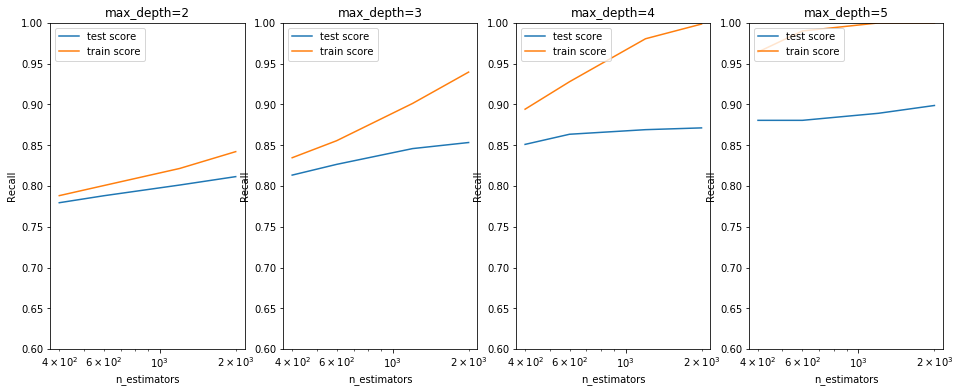

In [229]:
hyper_params = {
    'base_estimator__max_depth': [2, 3, 4],
    'n_estimators': [400,600,1200,2000]
}
plt.figure(figsize=(16, 6))
for n, depth in enumerate(hyper_params['base_estimator__max_depth']):

    plt.subplot(1, 4, n + 1)
    sub_df = cv_results_adaboost[cv_results_adaboost[
        'param_base_estimator__max_depth'] == depth]

    plt.plot(sub_df["param_n_estimators"], sub_df["mean_test_score"])
    plt.plot(sub_df["param_n_estimators"], sub_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('Recall')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

### Creating Final adaboost model with best chosen parameters

In [282]:
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=2000,
    learning_rate=0.1,
    algorithm="SAMME.R")

In [283]:
adaboost_model_1.fit(X_resampled, y_resampled)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=2000, random_state=None)

In [285]:
#making predictions
predictions = adaboost_model_1.predict(df_test_pca)

In [286]:
## Printing classification report for adaboost
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['nochurn','churn']))

             precision    recall  f1-score   support

    nochurn       0.96      0.79      0.87      8180
      churn       0.26      0.71      0.38       818

avg / total       0.90      0.79      0.83      8998



<b> We can see that recall for churn has improved but also non-churn recall has gone down as compared to other models. Additionally time taken to run the model ***'does not make this as favourite'***  

In [287]:
#Printing confusion matrix for adaboost
print(metrics.confusion_matrix(y_test, predictions), "\n")

[[6491 1689]
 [ 239  579]] 



In [288]:
##Printing feature importance
adaboost_model_1.feature_importances_

array([ 0.14474166,  0.11787852,  0.11376335,  0.08747396,  0.07669118,
        0.09529616,  0.08085339,  0.09003878,  0.1194523 ,  0.07381069])

In [309]:
raw_churn9.shape

(30019, 181)

##  XGboost Classifier

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc  # for deleting unused variables
%matplotlib inline

In [75]:
# creating a KFold object with 5 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# specify range of parameters (C) as a list
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2], 'subsample': [0.75, 0.9]}

# [x/10 for x in range(1,8,1)]

model_xgb = XGBClassifier(
    base_score=0.5,
    booster='dart',
    colsample_bylevel=1,
    learning_rate=0.1,
    max_delts_step=0,
    max_depth=4,
    subsample=0.75,
    n_estimators=100,
    min_child_weight=5,
    scale_pos_weight=1,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    colsample_bytree=0.9,
    silent=True,
    objective='rank:pairwise',
    grow_policy='lossguide',
    normalize_type='forest',
    sample_type='weighted')

# set up GridSearchCV()
model_cv1 = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=folds,
    verbose=1,
    return_train_score=True)

In [76]:
model_cv1.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
    verbose=False)

print(model_cv1.best_params_)
print(model_cv1.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.5min finished


{'learning_rate': 0.2, 'subsample': 0.9}
0.612983948355


In [77]:
# creating a KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# specify range of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'min_child_weight': [5, 7, 10],
    'reg_lambda': range(1, 9, 3)
}

# [x/10 for x in range(1,8,1)]

model_xgb = XGBClassifier(
    base_score=0.5,
    booster='dart',
    colsample_bylevel=1,
    learning_rate=0.2,
    max_delts_step=0,
    max_depth=4,
    subsample=0.9,
    scale_pos_weight=1,
    gamma=0,
    reg_alpha=0,
    colsample_bytree=0.9,
    n_jobs=2,
    objective='rank:pairwise',
    grow_policy='lossguide',
    normalize_type='forest',
    sample_type='weighted')

# set up GridSearchCV()
model_cv1 = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=folds,
    verbose=1,
    return_train_score=True)

In [78]:
model_cv1.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
    verbose=False)

print(model_cv1.best_params_)
print(model_cv1.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 10.1min finished


{'min_child_weight': 5, 'n_estimators': 100, 'reg_lambda': 1}
0.612983948355


In [82]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# specify range of parameters (C) as a list
# specify range of hyperparameters
param_grid = {'gamma': [i / 8.0 for i in range(0, 10)], 'max_depth': [3, 4, 5]}

model_xgb = XGBClassifier(
    base_score=0.5,
    booster='dart',
    colsample_bylevel=1,
    learning_rate=0.1,
    max_delts_step=0,
    min_child_weight=5,
    n_estimators=100,
    max_depth=4,
    subsample=0.75,
    scale_pos_weight=1,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    colsample_bytree=0.9,
    silent=True,
    objective='rank:pairwise',
    grow_policy='lossguide',
    normalize_type='forest',
    sample_type='weighted')

# set up GridSearchCV()
model_cv1 = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=folds,
    verbose=1,
    return_train_score=True)

model_cv1.fit(
    X_train,
    y_train,
    early_stopping_rounds=5,
    eval_set=[(X_test, y_test)],
    verbose=False)

print(model_cv1.best_params_)
print(model_cv1.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  5.2min finished


{'gamma': 0.0, 'max_depth': 4}
0.819681020824


In [ ]:
model_xgb = XGBClassifier(
    base_score=0.5,
    booster='dart',
    colsample_bylevel=1,
    learning_rate=0.1,
    max_delts_step=0,
    max_depth=4,
    subsample=0.75,
    n_estimators=100,
    min_child_weight=5,
    scale_pos_weight=1,
    gamma=0,
    njobs=1,
    seed=None,
    objective='rank:pairwise',
    randon_state=0,
    reg_alpha=0,
    nthread=None,
    reg_lambda=1,
    colsample_bytree=0.9,
    silent=True,
    grow_policy='lossguide',
    normalize_type='forest',
    sample_type='weighted')

In [84]:
model_xgb = XGBClassifier(
    base_score=0.5,
    booster='dart',
    colsample_bylevel=1,
    learning_rate=0.1,
    max_delts_step=0,
    min_child_weight=5,
    n_estimators=100,
    max_depth=4,
    subsample=0.75,
    scale_pos_weight=1,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    colsample_bytree=0.9,
    silent=True,
    objective='rank:pairwise',
    grow_policy='lossguide',
    normalize_type='forest',
    sample_type='weighted')

model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred = model_xgb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.91      0.95      8207
          1       0.49      0.83      0.61       799

avg / total       0.94      0.91      0.92      9006



## Final Model Selection 

<b> We build four models:<br> 1) Linear_SVM <br> 2) SVM with 'rbf' kernel<br> 3) ADABOOST <br> 4) XGboost<br>
    
Our main objective of the study is to build such a model which should be able predict the correct churners, moreover model should not also mis-classify non-churners also.

XGBOOST with overall recall of 91% and 83% recall on churners shows best performance. Additionally, XGBOOST also has highest overall f1-score of 92%.

***HENCE 'XGBOOST' IS FINAL SHORTLISTED MODEL FOR TELECOM CHURN PREDICTION*** 

# Part 3 : Recommendation and important variable analysis

Doing PCA-Logistic regression for detection of important variable. Further RandomForest will act as guide and different angle for variable importance and decision making

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

raw_churn7a = raw_churn7

raw_temp_scale = raw_churn7a.drop(columns='churn', axis=1)
raw_temp_scaled = Normalizer().fit_transform(raw_temp_scale)
raw_scaled_df = pd.DataFrame(
    raw_temp_scaled,
    index=raw_temp_scale.index,
    columns=raw_temp_scale.columns)
raw_churn_target = raw_churn7a['churn']
raw_scaled_df = pd.concat([raw_scaled_df, raw_churn_target], axis=1)

X_norm = raw_scaled_df.drop(columns='churn')
y_norm = raw_scaled_df['churn']

XN_train, XN_test, yn_train, yn_test = train_test_split(
    X_norm, y_norm, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
raw_churn7['churn'].value_counts()

0    27429
1     2590
Name: churn, dtype: int64

In [60]:
std_scale = preprocessing.StandardScaler().fit(raw_temp_scale)
df_std = std_scale.transform(raw_temp_scale)

Norm_scale = preprocessing.Normalizer().fit(raw_temp_scale)
df_norm = Norm_scale.transform(raw_temp_scale)

robust_scale = preprocessing.RobustScaler().fit(raw_temp_scale)
df_robust = robust_scale.transform(raw_temp_scale)

<b> Comparing different data scaling methods for the models

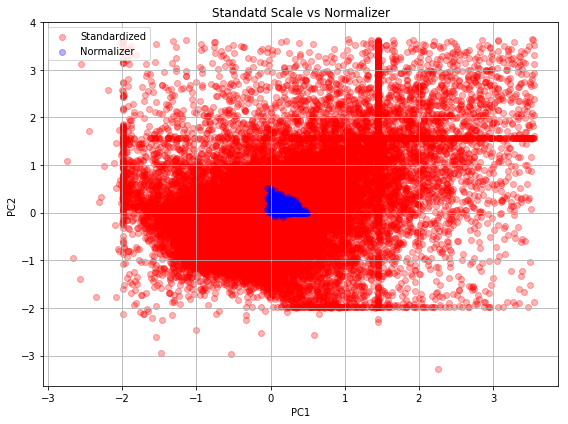

In [61]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    df_std[:, 0], df_std[:, 1], color='red', label='Standardized', alpha=0.3)

plt.scatter(
    df_norm[:, 0], df_norm[:, 1], color='blue', label='Normalizer', alpha=0.3)
plt.title('Standatd Scale vs Normalizer')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

plt.show()

**Above graph shows that normalizer is more compact and able to capture the variability in less number of components**<br>
**Hence Choosing normalizer for further process** 

In [62]:
from sklearn.decomposition import PCA

pca_again = PCA()

df_train_pca2 = pca_again.fit_transform(XN_train)
df_train_pca2.shape
df_test_pca2 = pca_again.transform(XN_test)

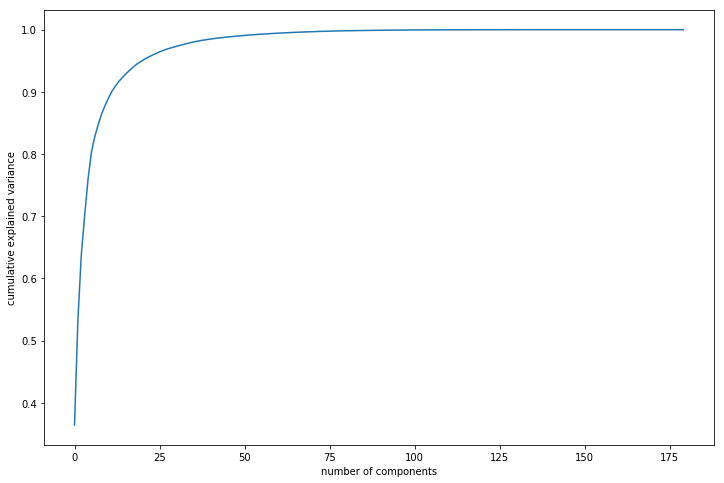

In [63]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca_again.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Approximately 25 components cover 96% of the variability of the data**

In [64]:
principalDf2 = pd.DataFrame(
    data=df_train_pca2[:, 1:3],
    columns=['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, raw_scaled_df[['churn']]], axis=1)

In [65]:
raw_scaled_df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'avg_onnet_mou_decline', 'avg_offnet_mou_decline',
       'avg_total_og_mou_decline', 'avg_total_rech_num_decline',
       'avg_total_rech_data_decline', 'avg_vbc_decline',
       'avg_monthly_3g_decline', 'avg_arpu_3g_decline', 'avg_arpu_2g_decline',
       'churn'],
      dtype='object', length=181)

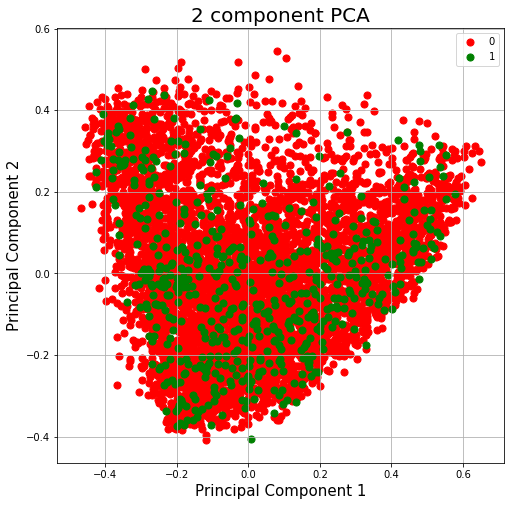

In [66]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf2['churn'] == target
    ax.scatter(
        finalDf2.loc[indicesToKeep, 'principal component 1'],
        finalDf2.loc[indicesToKeep, 'principal component 2'],
        c=color,
        s=50)
ax.legend(targets)
ax.grid()

In [67]:
colnames = list(XN_train.columns)

In [68]:
pcs_df = pd.DataFrame(
    data=pca_again.components_[:, 0:25],
    columns=[
        "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10",
        "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", 'PC17', "PC18", "PC19",
        "PC20", "PC21", "PC22", "PC23", "PC24", "PC25"
    ],
    index=colnames)

In [69]:
pcs_df.to_csv("pcs_df.csv")
pcs_df2 = pcs_df.apply(abs)
pcs_df2 = pcs_df2.round(2)
pcs_df2.to_csv("pcs_df2.csv")

In [70]:
short_listed_var = []
shorlist_pca = pcs_df2.columns

for x in shorlist_pca:
    a = pcs_df2[pcs_df2[x] == pcs_df2[x].max()].index[0]
    short_listed_var.append(a)

print(len(short_listed_var))
print(short_listed_var)

25
['loc_og_mou_8', 'loc_og_mou_6', 'loc_ic_t2f_mou_7', 'total_ic_mou_7', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'last_day_rch_amt_8', 'count_rech_2g_7', 'av_rech_amt_data_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'total_rech_data_6', 'spl_ic_mou_7', 'total_og_mou_7', 'ic_others_7', 'arpu_3g_6', 'arpu_3g_8', 'arpu_3g_8', 'monthly_3g_8']


***Shortlisting top 25 variables with highest loading from top 25 components which covers approx. 96% of variability in data***

In [71]:
short_listed_var = list(set(short_listed_var))
len(short_listed_var)

20

***Out of 25 variables 20 are unique variables***

In [510]:
X[short_listed_var].corr().round(2)

,loc_ic_t2t_mou_8,last_day_rch_amt_8,loc_ic_t2m_mou_6,arpu_3g_6,count_rech_2g_7,last_day_rch_amt_6,loc_ic_t2f_mou_7,total_ic_mou_7,spl_ic_mou_6,total_rech_data_6,ic_others_7,monthly_3g_8,loc_og_mou_6,spl_ic_mou_7,roam_og_mou_8,arpu_3g_8,av_rech_amt_data_8,loc_og_mou_8,total_og_mou_7,std_ic_t2f_mou_8
loc_ic_t2t_mou_8,1.00,0.15,0.36,0.02,0.01,0.07,0.23,0.55,0.03,0.02,0.05,0.05,0.40,-0.02,-0.07,0.05,0.07,0.51,0.09,0.11
last_day_rch_amt_8,0.15,1.00,0.13,0.18,-0.10,0.32,0.16,0.17,-0.04,-0.01,0.02,0.25,0.16,-0.02,0.04,0.25,0.21,0.25,0.01,0.12
loc_ic_t2m_mou_6,0.36,0.13,1.00,0.03,0.00,0.10,0.35,0.67,0.05,0.03,0.07,0.05,0.61,-0.04,-0.06,0.05,0.07,0.48,-0.00,0.13
arpu_3g_6,0.02,0.18,0.03,1.00,0.01,0.25,0.05,0.03,-0.04,0.46,-0.01,0.58,-0.00,-0.01,-0.01,0.63,0.53,0.00,-0.19,0.04
count_rech_2g_7,0.01,-0.10,0.00,0.01,1.00,-0.14,-0.01,0.02,0.00,0.58,0.01,-0.03,-0.02,-0.00,-0.01,0.03,0.29,0.00,-0.08,0.00
last_day_rch_amt_6,0.07,0.32,0.10,0.25,-0.14,1.00,0.10,0.10,-0.05,-0.01,0.02,0.20,0.14,-0.03,0.04,0.20,0.14,0.13,-0.02,0.09
loc_ic_t2f_mou_7,0.23,0.16,0.35,0.05,-0.01,0.10,1.00,0.46,-0.00,0.02,0.06,0.07,0.27,-0.02,-0.05,0.07,0.08,0.27,-0.02,0.21
total_ic_mou_7,0.55,0.17,0.67,0.03,0.02,0.10,0.46,1.00,0.02,0.02,0.17,0.06,0.47,-0.01,-0.04,0.06,0.08,0.48,0.15,0.22
spl_ic_mou_6,0.03,-0.04,0.05,-0.04,0.00,-0.05,-0.00,0.02,1.00,-0.00,0.10,-0.04,0.06,0.20,-0.02,-0.04,-0.05,0.02,0.00,-0.03
total_rech_data_6,0.02,-0.01,0.03,0.46,0.58,-0.01,0.02,0.02,-0.00,1.00,-0.00,0.24,-0.01,-0.00,-0.02,0.32,0.48,-0.02,-0.19,0.02


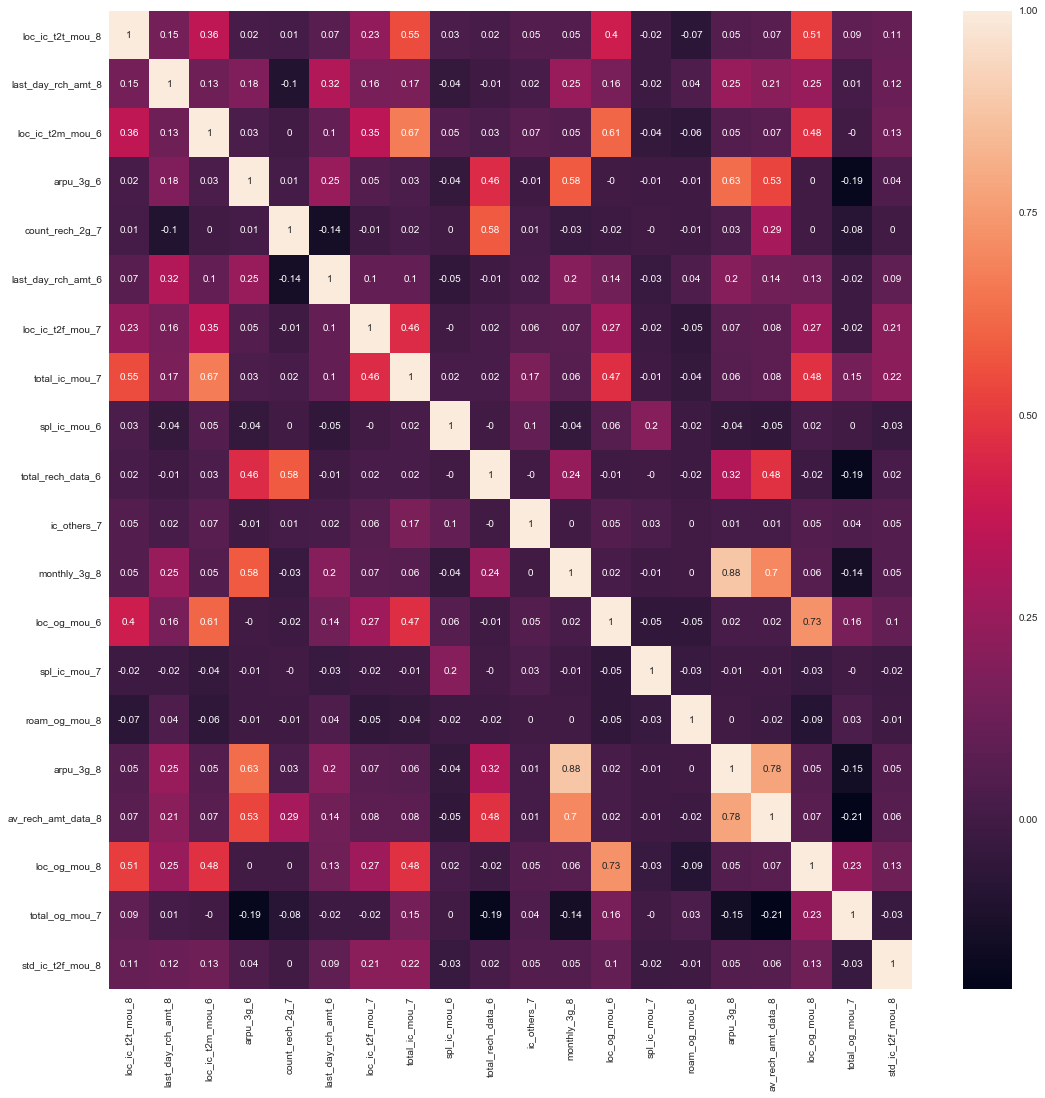

In [511]:
plt.figure(figsize=(18, 18))

sns.heatmap(X[short_listed_var].corr().round(2), annot=True)

## Logistic regression model on Selected Variables for important variables selection

#### Feature Selection Using RFE

In [533]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

X_shortlist = X[short_listed_var]

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_shortlist, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [534]:
X_shortlist_final = rfe.transform(X_shortlist)

In [535]:
X_shortlist_final = X_shortlist.loc[:, rfe.support_]
col = X_shortlist_final.columns

In [536]:
X_shortlist_final.shape

(30019, 20)

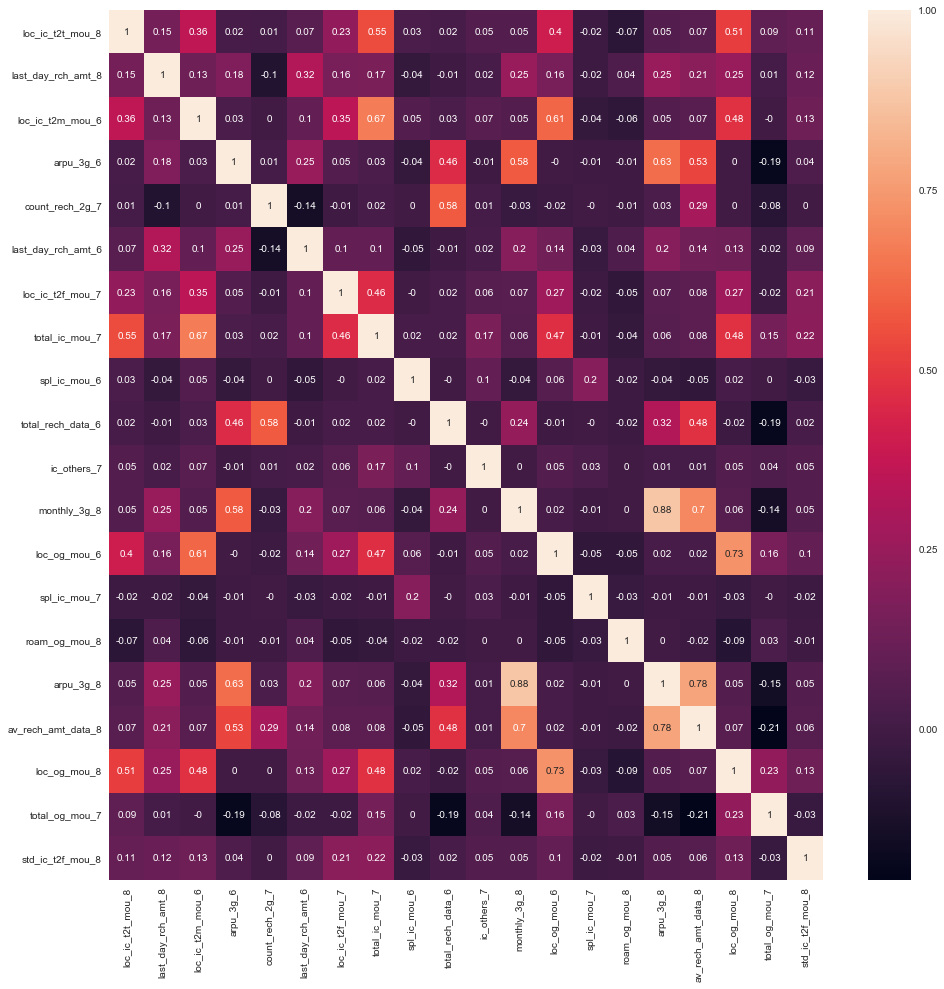

In [537]:
plt.figure(figsize=(16, 16))

sns.heatmap(X[col].corr().round(2), annot=True)

In [538]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# X_train, y_train

X_final = X[col].reset_index(drop=True)

In [539]:
# logm = sm.GLM(y,zscore(sm.add_constant(X[col])), family = sm.families.Binomial())
logm = sm.GLM(y, X[col], family=sm.families.Binomial())
modres = logm.fit()
log_model = logm.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                30019
Model:                            GLM   Df Residuals:                    29999
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -20274.
Date:                Sun, 26 Aug 2018   Deviance:                       40547.
Time:                        01:57:09   Pearson chi2:                 2.99e+04
No. Iterations:                     4                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_ic_t2t_mou_8      -0.0753      0.015     -4.916      0.000      -0.105      -0.045
last_day_rch_amt_8    -0.1735      0.013    -13.068      0.000      -0.200      -0.147
loc_ic_t2m_mou_6      -0.0056      0.018     -0.304      0.761      -0.042       0.030
arpu_3g_6              0.0562      0.017      3.224      0.001       0.022       0.090
count_rech_2g_7       -0.0305      0.016     -1.902      0.057      -0.062       0.001
last_day_rch_amt_6     0.0359      0.013      2.759      0.006       0.010       0.061
loc_ic_t2f_mou_7      -0.0133      0.014     -0.980      0.327      -0.040       0.013
total_ic_mou_7        -0.0017      0.019     -0.087      0.931      -0.040       0.037
spl_ic_mou_6          -0.0145      0.012     -1.200      0.230      -0.038       0.009
total_rech_data_6      0.0153      0.018      0.864      0.388      -0.019       0.050
ic_others_7           -0.0066      0.012     -0.550      0.582      -0.030       0.017
monthly_3g_8           0.0155      0.025      0.609      0.543      -0.034       0.065
loc_og_mou_6           0.1527      0.020      7.730      0.000       0.114       0.191
spl_ic_mou_7          -0.0105      0.012     -0.874      0.382      -0.034       0.013
roam_og_mou_8          0.0965      0.012      7.957      0.000       0.073       0.120
arpu_3g_8              0.0266      0.030      0.894      0.371      -0.032       0.085
av_rech_amt_data_8    -0.1789      0.022     -8.165      0.000      -0.222      -0.136
loc_og_mou_8          -0.2699      0.020    -13.795      0.000      -0.308      -0.232
total_og_mou_7        -0.0129      0.013     -0.997      0.319      -0.038       0.012
std_ic_t2f_mou_8      -0.0259      0.012     -2.099      0.036      -0.050      -0.002
======================================================================================
"""

In [551]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

X_final1 = X[col].drop(
    [
        'monthly_3g_8', 'arpu_3g_8', 'total_ic_mou_7', 'loc_og_mou_6',
        'total_rech_data_6', 'ic_others_7', 'loc_ic_t2f_mou_7', 'spl_ic_mou_6',
        'total_og_mou_7', 'spl_ic_mou_7'
    ],
    axis=1)
X_final1

# logm = sm.GLM(y,zscore(sm.add_constant(X[col])), family = sm.families.Binomial())
logm = sm.GLM(y, X_final1, family=sm.families.Binomial())
modres = logm.fit()
log_model = logm.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                30019
Model:                            GLM   Df Residuals:                    30009
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -20309.
Date:                Sun, 26 Aug 2018   Deviance:                       40617.
Time:                        02:08:14   Pearson chi2:                 2.99e+04
No. Iterations:                     4                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_ic_t2t_mou_8      -0.0787      0.014     -5.627      0.000      -0.106      -0.051
last_day_rch_amt_8    -0.1779      0.013    -13.503      0.000      -0.204      -0.152
loc_ic_t2m_mou_6       0.0429      0.014      3.142      0.002       0.016       0.070
arpu_3g_6              0.0749      0.015      5.161      0.000       0.046       0.103
count_rech_2g_7       -0.0307      0.013     -2.419      0.016      -0.056      -0.006
last_day_rch_amt_6     0.0421      0.013      3.254      0.001       0.017       0.067
roam_og_mou_8          0.1008      0.012      8.350      0.000       0.077       0.124
av_rech_amt_data_8    -0.1523      0.015    -10.042      0.000      -0.182      -0.123
loc_og_mou_8          -0.1850      0.015    -12.204      0.000      -0.215      -0.155
std_ic_t2f_mou_8      -0.0301      0.012     -2.490      0.013      -0.054      -0.006
======================================================================================
"""

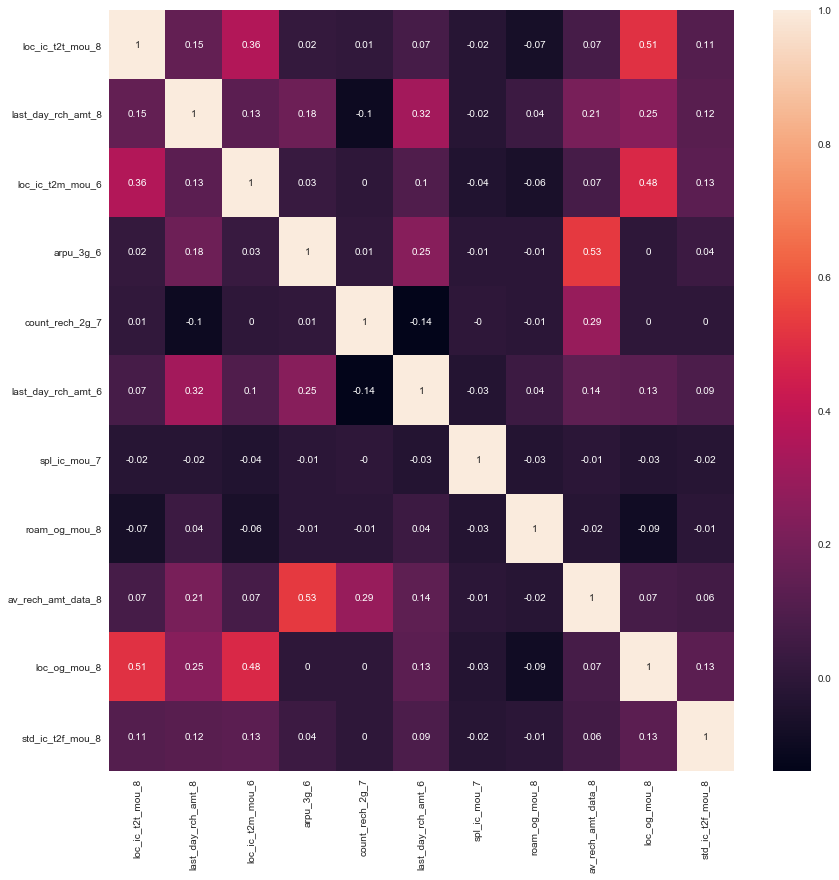

In [550]:
plt.figure(figsize=(14,14))

sns.heatmap(X_final1.corr().round(2),annot=True)

In [552]:
shortlist_imp_var = list(
    round(abs(log_model.tvalues), 3).sort_values(ascending=False).index)
shortlist_imp_var

['last_day_rch_amt_8',
 'loc_og_mou_8',
 'av_rech_amt_data_8',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_8',
 'arpu_3g_6',
 'last_day_rch_amt_6',
 'loc_ic_t2m_mou_6',
 'std_ic_t2f_mou_8',
 'count_rech_2g_7']

In [553]:
shortlist_imp_var = X_final1.columns

In [258]:
# shortlist_imp_var = list(shortlist_imp_var)

### Descriptive analytics using shortlisted important variables

In [570]:
raw_churn8a = raw_churn7
raw_churn8a['churnvar'] = raw_churn8a['churn'].map({
    0: "Non-Churn",
    1: "Churn"
})
data_descriptive = raw_churn8a.groupby('churnvar', as_index=True)

In [573]:
shortlist_imp_var

Index(['loc_ic_t2t_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_6',
       'arpu_3g_6', 'count_rech_2g_7', 'last_day_rch_amt_6', 'roam_og_mou_8',
       'av_rech_amt_data_8', 'loc_og_mou_8', 'std_ic_t2f_mou_8'],
      dtype='object')

***Top 10 shortlisted variables from PCA - logistic regression:*** 

In [571]:
data_descriptive[shortlist_imp_var].mean().round(2).T

churnvar,Churn,Non-Churn
loc_ic_t2t_mou_8,14.22,70.78
last_day_rch_amt_8,34.41,101.37
loc_ic_t2m_mou_6,112.79,163.94
arpu_3g_6,45.74,54.87
count_rech_2g_7,0.48,0.75
last_day_rch_amt_6,101.28,104.76
roam_og_mou_8,46.43,19.10
av_rech_amt_data_8,20.35,96.59
loc_og_mou_8,52.09,280.79
std_ic_t2f_mou_8,0.51,2.89


In [ ]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_ic_t2t_mou_8", data=raw_churn8a)
ax.set_title('', fontsize=20)

## RandomForest Classifier for important variable identification

In [625]:
rfc = RandomForestClassifier(
    max_depth=4,
    criterion='gini',
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    random_state=75,
    verbose=0,
    class_weight={
        0: 1,
        1: 3
    })

rfc.fit(XN_train, yn_train)
y_pred = rfc.predict(XN_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(yn_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      8207
          1       0.68      0.56      0.61       799

avg / total       0.93      0.94      0.93      9006



In [631]:
rf_dt = pd.DataFrame({
    "Importance": rfc.feature_importances_,
    "Variables": list(XN_train.columns)
}).sort_values(
    by='Importance', ascending=False)
feature_names = list(rf_dt["Variables"][0:20])
print(list(rf_dt["Variables"][0:10]))

['loc_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_og_mou_8', 'arpu_8', 'avg_arpu_vs_arpu_8', 'offnet_mou_8', 'onnet_mou_8', 'avg_total_og_mou_decline', 'avg_total_rech_num_decline']


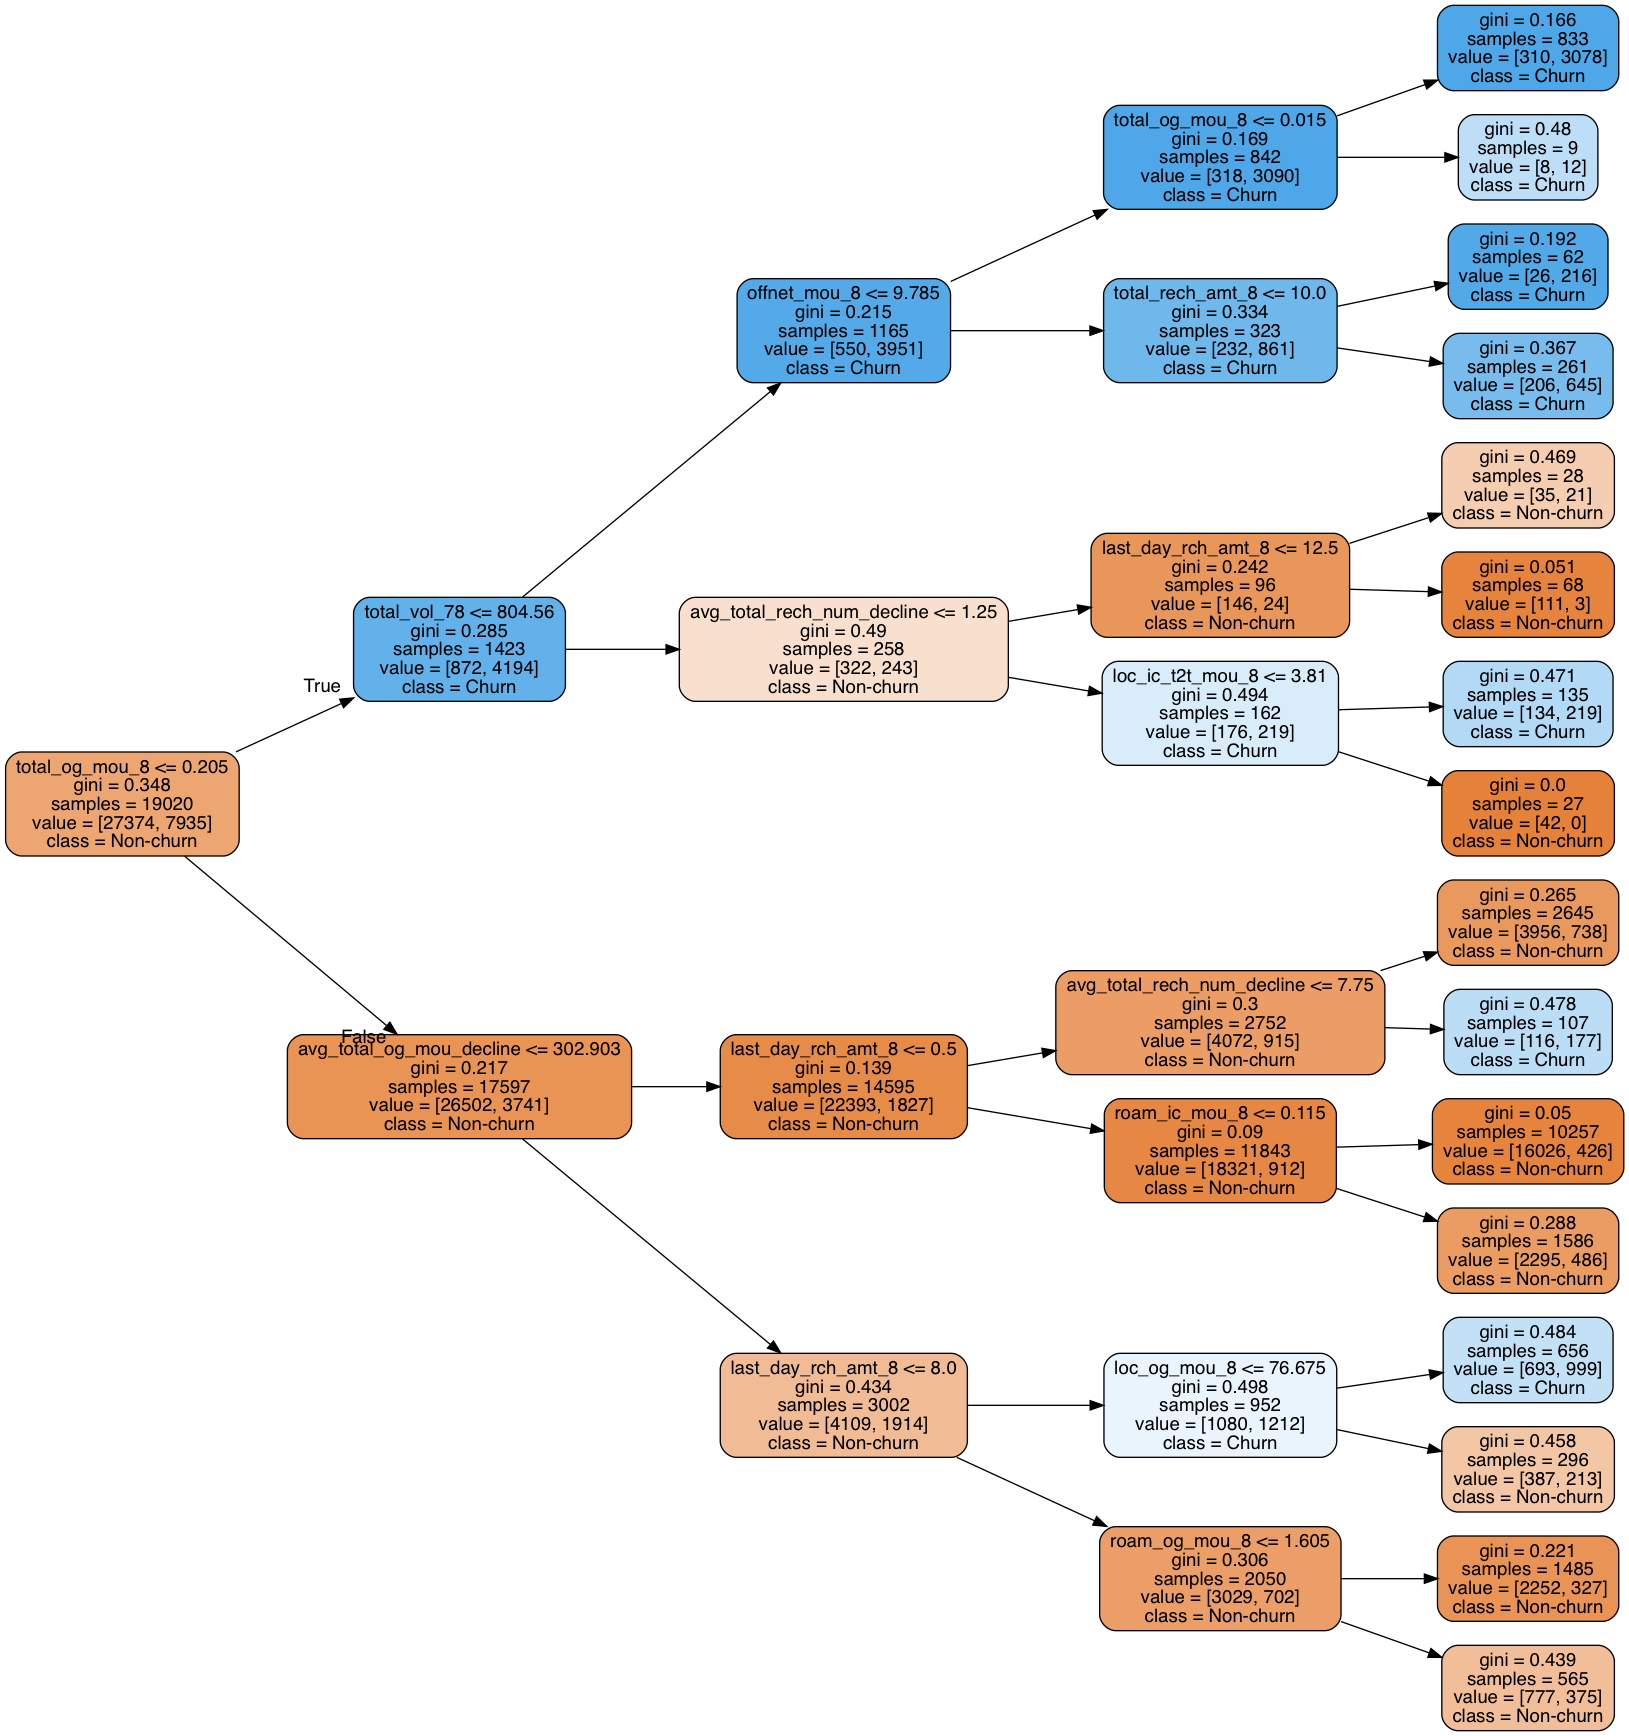

In [629]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import six
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import os

data_idp = raw_churn8a[feature_names]

target = raw_churn8a['churn']

# data_idp=X_train

# target=y_train

# feature_names = list(X_train.columns)

# feature_names = [
#     'loc_ic_t2t_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_6', 'arpu_3g_6',
#     'count_rech_2g_7', 'last_day_rch_amt_6', 'roam_og_mou_8',
#     'av_rech_amt_data_8', 'loc_og_mou_8', 'std_ic_t2f_mou_8'
# ]

class_names = ['Non-churn', 'Churn']

clf3 = RandomForestClassifier(
    max_depth=4,
    criterion='gini',
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    random_state=75,
    verbose=0,
    class_weight={
        0: 1,
        1: 3
    })

#scores = cross_val_score(clf, X, y)
model3 = clf3.fit(data_idp, target)

# Random forest trees

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in model3.estimators_:
    if (i_tree < 1):
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(
            dotfile.getvalue()).write_png('dtree' + str(i_tree) + '.png')
        i_tree = i_tree + 1

export_graphviz(
    tree_in_forest,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    rotate=True,
    out_file='TC_churn.dot',
)
os.system('dot -Tpng TC_churn.dot -o TC_churn.png')

dot_data = export_graphviz(
    tree_in_forest,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    rotate=True,
    out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("Telecom_churn_impvar.pdf")

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

## Outcome analysis and graphical analysis

**Outcome Analysis:**
Top 10 important variables as per RF tree are: 
1. 'loc_og_mou_8', <br>
2. 'loc_ic_t2m_mou_8',<br> 
3. 'total_ic_mou_8',<br>
4. 'total_og_mou_8',<br>
5. 'arpu_8',<br>
6. 'avg_arpu_vs_arpu_8',<br> 
7. 'offnet_mou_8',<br>
8. 'onnet_mou_8', <br>
9. 'avg_total_og_mou_decline',<br> 
10. 'avg_total_rech_num_decline'<br>

**Top Intakes Tree:**
- Total outgoing minutes are significantly less for churners as compared to non-churners
- Churners are using significantly less total volume
- Roaming outgoing plays a pivot role in churn
- There is significant difference between the last day of recharge

Text(0.5,1,'Local T2T MOU Eighth Month')

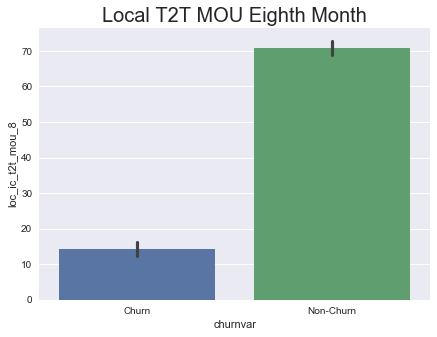

In [593]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_ic_t2t_mou_8", data=raw_churn8a)
ax.set_title('Local T2T MOU Eighth Month', fontsize=20)

Text(0.5,1,'Local Outgoing MOU Eighth Month')

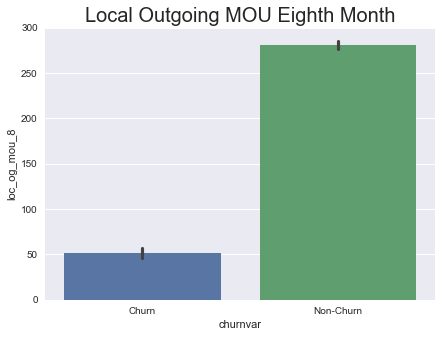

In [594]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_og_mou_8", data=raw_churn8a)
ax.set_title('Local Outgoing MOU Eighth Month', fontsize=20)

Text(0.5,1,'Roaming Incoming MOU Eighth Month')

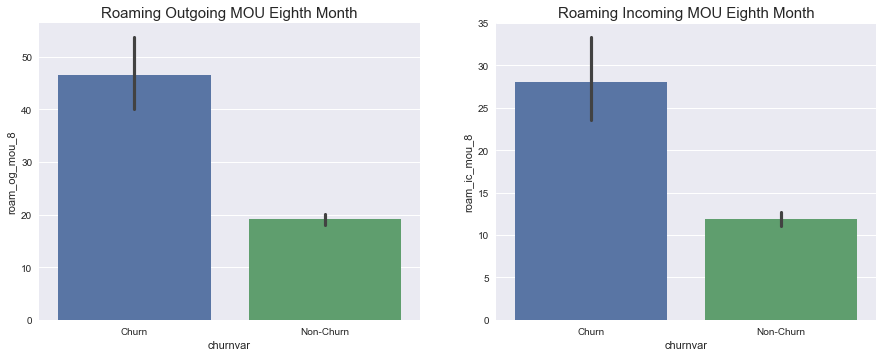

In [645]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="roam_og_mou_8", data=raw_churn8a)
ax.set_title('Roaming Outgoing MOU Eighth Month', fontsize=15)

plt.subplot(2, 2, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="roam_ic_mou_8", data=raw_churn8a)
ax.set_title('Roaming Incoming MOU Eighth Month', fontsize=15)

***Analysis: Above graphs shows that people who churn have high roaming as compared to non-churners, which shows raoming mou played a very important role in deciding on churn decision***

Text(0.5,1,'Local outgoing MOU eight month')

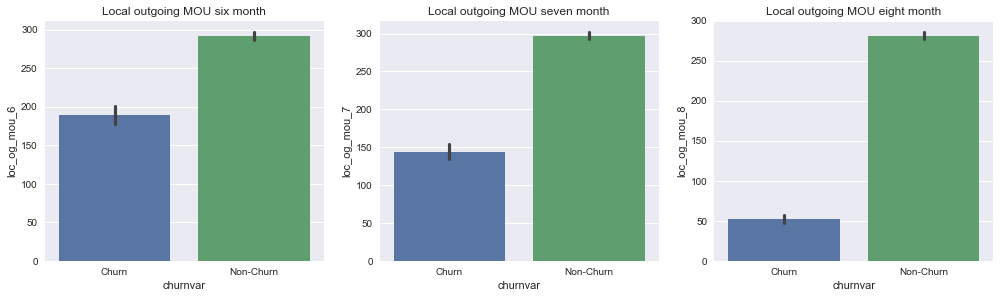

In [656]:
plt.figure(figsize=(17, 15))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_og_mou_6", data=raw_churn8a)
ax.set_title('Local outgoing MOU six month', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_og_mou_7", data=raw_churn8a)
ax.set_title('Local outgoing MOU seven month', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="loc_og_mou_8", data=raw_churn8a)
ax.set_title('Local outgoing MOU eight month', fontsize=12)

Text(0.5,1,'Std outgoing MOU eight month')

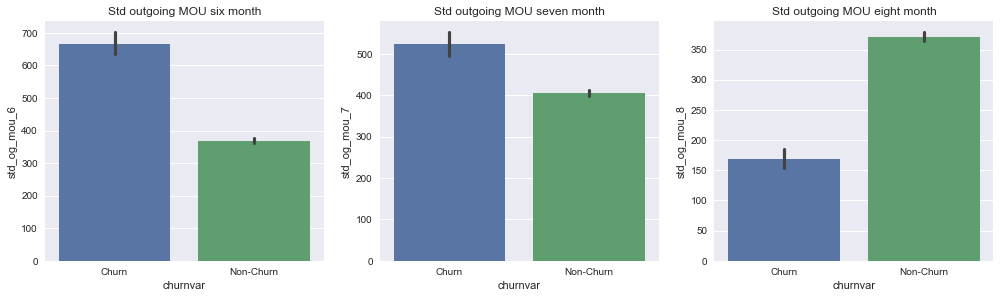

In [657]:
plt.figure(figsize=(17, 15))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_og_mou_6", data=raw_churn8a)
ax.set_title('Std outgoing MOU six month', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_og_mou_7", data=raw_churn8a)
ax.set_title('Std outgoing MOU seven month', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_og_mou_8", data=raw_churn8a)
ax.set_title('Std outgoing MOU eight month', fontsize=12)

***Analysis: Local outgoing  MOU has declined steadly over last 3 months as compared to Std. However we can see that on the eighth month std MOU declined as compared to previous two months***

Text(0.5,1,'Std incoming MOU eight month')

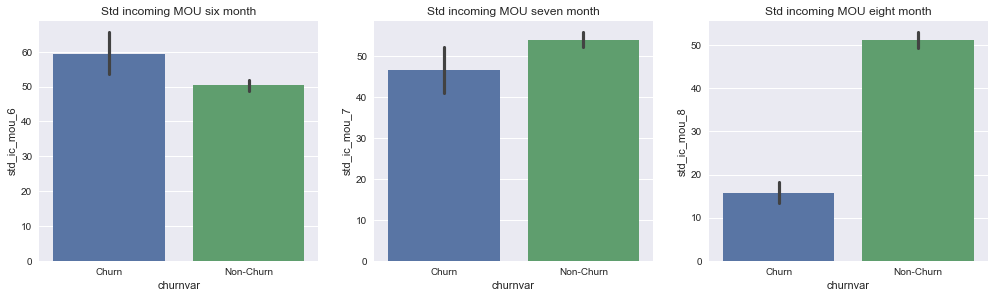

In [660]:
plt.figure(figsize=(17, 15))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_ic_mou_6", data=raw_churn8a)
ax.set_title('Std incoming MOU six month', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_ic_mou_7", data=raw_churn8a)
ax.set_title('Std incoming MOU seven month', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_ic_mou_8", data=raw_churn8a)
ax.set_title('Std incoming MOU eight month', fontsize=12)

***Analysis: Above STD and Local graphs shows that consumers decreased the usage in eighth month***

Text(0.5,1,'STD Incoming T2M MOU Eighth Month')

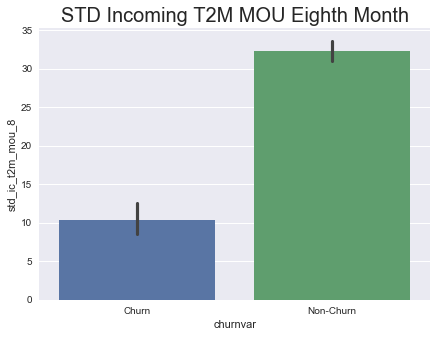

In [617]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="std_ic_t2m_mou_8", data=raw_churn8a)
ax.set_title('STD Incoming T2M MOU Eighth Month', fontsize=20)

Text(0.5,1,'Eighth Month')

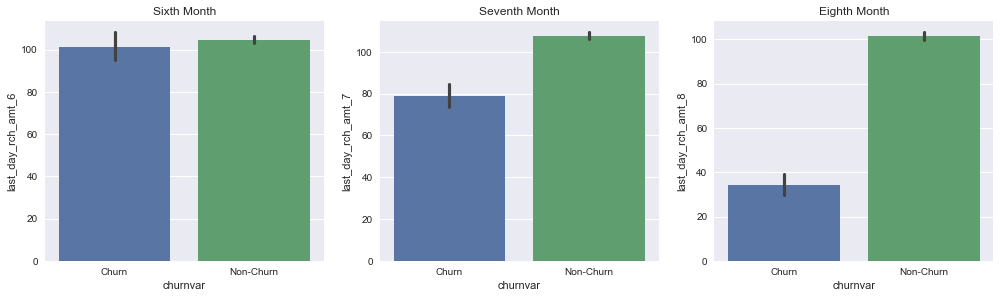

In [644]:
plt.figure(figsize=(17, 15))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="last_day_rch_amt_6", data=raw_churn8a)
ax.set_title('Sixth Month', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="last_day_rch_amt_7", data=raw_churn8a)
ax.set_title('Seventh Month', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="last_day_rch_amt_8", data=raw_churn8a)
ax.set_title('Eighth Month', fontsize=12)

***Analysis:There is steady decline on last day of recharge amount, which shows that churn was not a sudden decision. Recharge amount decreased from sixth to eighth month***

Text(0.5,1,'Total volume quartile_78')

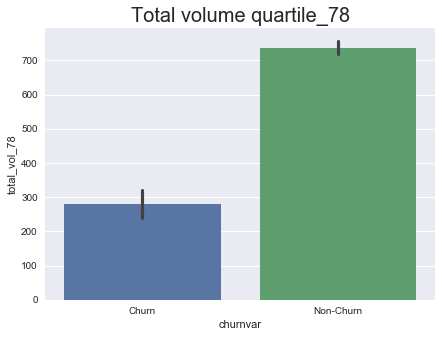

In [632]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="total_vol_78", data=raw_churn8a)
ax.set_title('Total volume quartile_78', fontsize=20)

Text(0.5,1,'Total volume used in last 3 months')

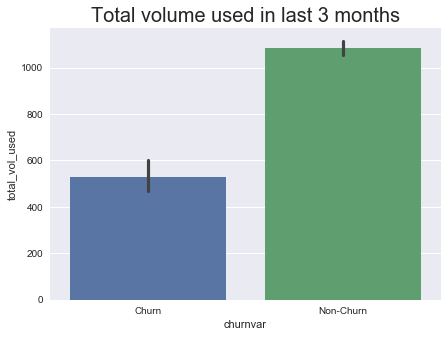

In [634]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="total_vol_used", data=raw_churn8a)
ax.set_title('Total volume used in last 3 months', fontsize=20)

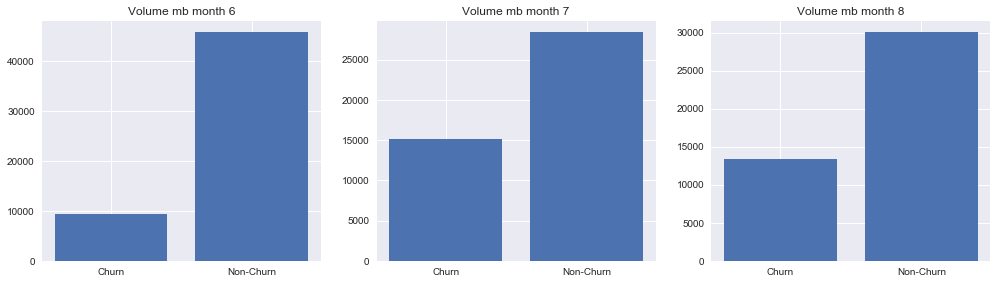

In [647]:
plt.figure(figsize=(17, 15))

plt.subplot(3, 3, 1)
plt.bar(
    raw_churn8a['churnvar'],
    raw_churn8a[['vol_3g_mb_6', 'vol_2g_mb_6']].sum(axis=1),
    align='center')
plt.title('Volume mb month 6')

plt.subplot(3, 3, 2)
plt.bar(
    raw_churn8a['churnvar'],
    raw_churn8a[['vol_3g_mb_7', 'vol_2g_mb_7']].sum(axis=1),
    align='center')
plt.title('Volume mb month 7')

plt.subplot(3, 3, 3)
plt.bar(
    raw_churn8a['churnvar'],
    raw_churn8a[['vol_3g_mb_8', 'vol_2g_mb_8']].sum(axis=1),
    align='center')
plt.title('Volume mb month 8')

plt.show()

Text(0.5,1,'3G Volume mb month 8')

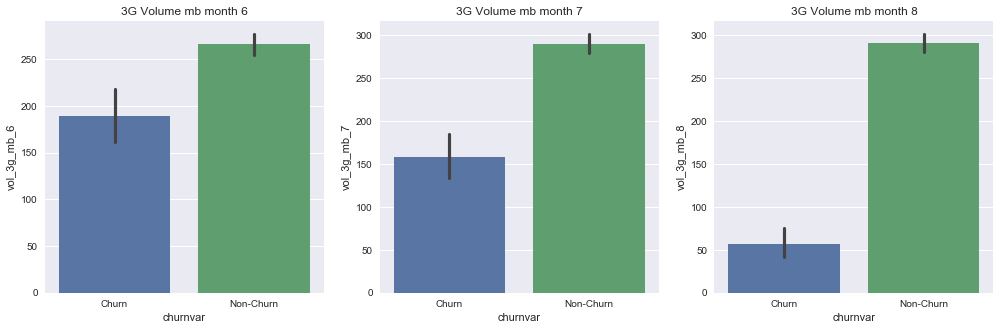

In [651]:
plt.figure(figsize=(17, 17))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_3g_mb_6", data=raw_churn8a)
ax.set_title('3G Volume mb month 6', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_3g_mb_7", data=raw_churn8a)
ax.set_title('3G Volume mb month 7', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_3g_mb_8", data=raw_churn8a)
ax.set_title('3G Volume mb month 8', fontsize=12)

Text(0.5,1,'2G Volume mb month 8')

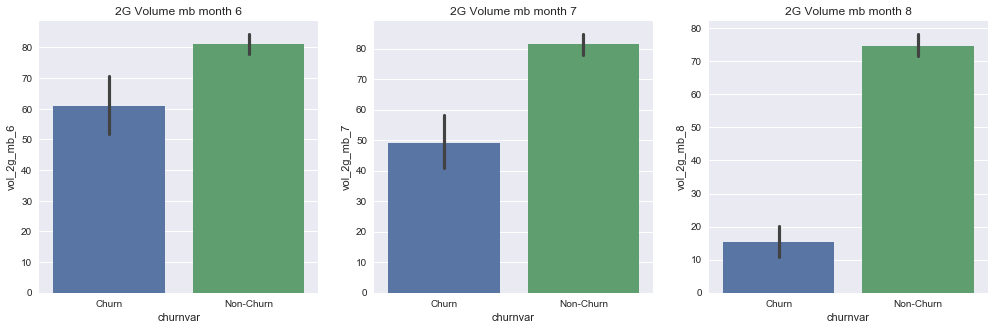

In [652]:
plt.figure(figsize=(17, 17))

plt.subplot(3, 3, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_2g_mb_6", data=raw_churn8a)
ax.set_title('2G Volume mb month 6', fontsize=12)

plt.subplot(3, 3, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_2g_mb_7", data=raw_churn8a)
ax.set_title('2G Volume mb month 7', fontsize=12)

plt.subplot(3, 3, 3)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="vol_2g_mb_8", data=raw_churn8a)
ax.set_title('2G Volume mb month 8', fontsize=12)

***Analysis: Above graph analysis shows that overall volume used (3g,2g) has declined over the last 3 months, however 3g volume decline is larger a compared to 2g volume***

Text(0.5,1,'Average outgoing MOU decline last 3 months')

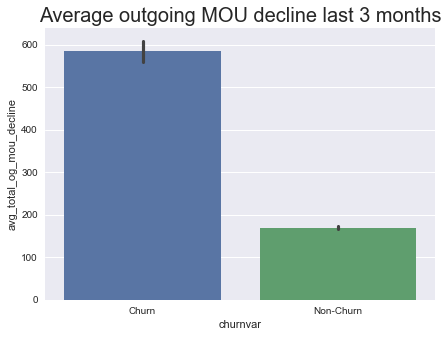

In [658]:
plt.figure(figsize=(7, 5))

sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="avg_total_og_mou_decline", data=raw_churn8a)
ax.set_title('Average outgoing MOU decline last 3 months', fontsize=20)

***Analysis: Average MOU has seen a very significant decline over past 3 months***

Text(0.5,1,'onnet MOU Eighth Month')

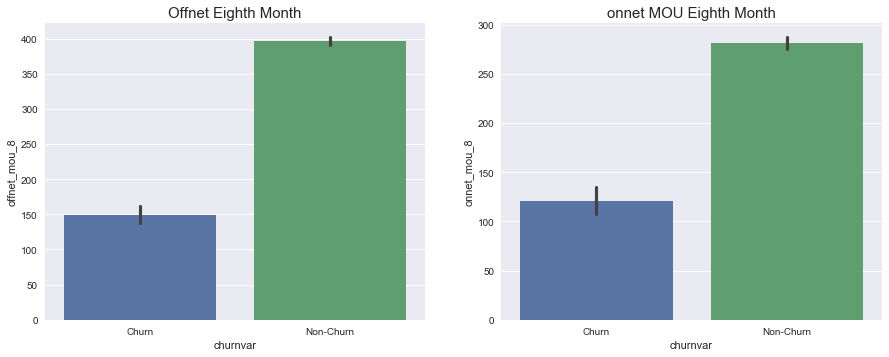

In [659]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="offnet_mou_8", data=raw_churn8a)
ax.set_title('Offnet Eighth Month', fontsize=15)

plt.subplot(2, 2, 2)
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1)
ax = sns.barplot(x="churnvar", y="onnet_mou_8", data=raw_churn8a)
ax.set_title('onnet MOU Eighth Month', fontsize=15)

## Summary and Recommendation
***Summary***<br>

1. Consumers who were in roaming in last two months were one of the biggest churners<br>
2. There is steady decline in the recharge amount ant counts over past 3 months<br>
3. Consumers also reduced the calls and MOU over the months, which is clear indication of moving from current povider
4. STD and Local incomming and outgoing calls and mou shows interesting pattern, local mou and calls showed a steady decline. However consumers continue to use services for STD incoming/outgoing calls which declined suddenly in eight month. This shows that users are still prefering provider for STD calls
5. Large gaps in recharge is incrasing the risk of churn by 17% per day.
<br>

***Recommendation***<br>
1. Above analysis shows that consumers who were in roaming have high churn ratio. Hence, it is clear that they were not satisfied with the roaming facalities provided. Improvement in roaming  network infrastructure and charges is recommended
2. Steady decline in local MOU and calls as compared to std, clears the doubt that users don't prefer provider for local calls. Hence provider must indulge customers to use more local calls by providing better recharge packages and improvment in local network.
3. Service provider should also provide more options  and reduced charges to increase in usage of data_volume
4. Decline in recharge amount and frequency is also good indicator of coustomer movement. Hence Service provider should also provide dicounted recharge coupns
to make him recharge
5. Decline in overall use of services shows reduction in cosumer indulgence and possible churn.Service provider should provide regular vouchers(hourly,daily, weekly and monthly) games, online competetions etc. to keep him interested and engaged. 